#### objective : Predict the probability of default if credit card is approved? 
#### Create a scorecard for each applicant.
#### Decide a cut-off by balancing trade-off between approval rate and risk of credit loss. 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read given CSV files into individual dataframes and then merging them 
demographic_df = pd.read_csv("Demographic data.csv", sep=",")
credit_df = pd.read_csv("Credit Bureau data.csv", sep=",")

In [4]:
demographic_df.head(5)

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [5]:
credit_df.head(5)

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [6]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 5.2+ MB


In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [8]:
# removing white spaces in demographic_df
demographic_df.columns = demographic_df.columns.str.strip()

In [9]:
# replacing space with underscore in demographic_df
demographic_df.columns = demographic_df.columns.str.replace(' ', '_')

In [10]:
# removing white spaces in credit_df
credit_df.columns = credit_df.columns.str.strip()

In [11]:
# replacing space with underscore in credit_df
credit_df.columns = credit_df.columns.str.replace(' ', '_')

In [12]:
demographic_df.shape

(71295, 12)

In [13]:
credit_df.shape

(71295, 19)

In [14]:
# checking null values in demographic_df column wise
demographic_df.isna().sum()

Application_ID                                    0
Age                                               0
Gender                                            2
Marital_Status_(at_the_time_of_application)       6
No_of_dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type_of_residence                                 8
No_of_months_in_current_residence                 0
No_of_months_in_current_company                   0
Performance_Tag                                1425
dtype: int64

In [15]:
# checking null values in credit_df column wise
credit_df.isna().sum()

Application_ID                                                        0
No_of_times_90_DPD_or_worse_in_last_6_months                          0
No_of_times_60_DPD_or_worse_in_last_6_months                          0
No_of_times_30_DPD_or_worse_in_last_6_months                          0
No_of_times_90_DPD_or_worse_in_last_12_months                         0
No_of_times_60_DPD_or_worse_in_last_12_months                         0
No_of_times_30_DPD_or_worse_in_last_12_months                         0
Avgas_CC_Utilization_in_last_12_months                             1058
No_of_trades_opened_in_last_6_months                                  1
No_of_trades_opened_in_last_12_months                                 0
No_of_PL_trades_opened_in_last_6_months                               0
No_of_PL_trades_opened_in_last_12_months                              0
No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)        0
No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans) 

In [16]:
# Total sum of null values in demographic_df
demographic_df.isna().sum().sum()

1577

In [17]:
# Total sum of null values in credit_df
credit_df.isna().sum().sum()

3028

In [18]:
# count the duplicate entry in demographic_df
duplicate_rows_df = demographic_df[demographic_df.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 12)


In [19]:
# count the duplicate entry in credit_df
duplicate_rows_df = credit_df[credit_df.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 19)


In [20]:
# count the duplicate entry for these application id in demographic_df
duplicated_rows_df_duplicate_link= demographic_df[demographic_df.duplicated(['Application_ID'])]
print (duplicated_rows_df_duplicate_link.shape)

(3, 12)


In [21]:
# count the duplicate entry for these application id in credit_df
duplicated_rows_df_duplicate_link= credit_df[credit_df.duplicated(['Application_ID'])]
print (duplicated_rows_df_duplicate_link.shape)

(3, 19)


In [22]:
len(demographic_df.Application_ID.unique())

71292

##### So total number of unique links are 71292 and if you have noticed that duplicate links were 3, adding them gives (71292 + 3 = 71295) total number of rows. It is necessary to select the unique rows for better analysis, so at least we can drop the rows with same values in all column

In [23]:
demographic_df[demographic_df.duplicated(['Application_ID'], keep=False)]

,Application_ID,Age,Gender,Marital_Status_(at_the_time_of_application),No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,No_of_months_in_current_company,Performance_Tag
5243,653287861,26,M,Married,3.0,25.0,Bachelor,SAL,Rented,112,58,0.0
24386,765011468,57,M,Single,4.0,4.5,Bachelor,SAL,Company provided,6,56,0.0
27586,765011468,38,M,Married,4.0,4.5,Professional,SAL,Rented,6,72,0.0
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0
48602,671989187,27,M,Married,2.0,35.0,Professional,SAL,Living with Parents,108,7,0.0
59022,671989187,57,M,Married,4.0,7.0,Professional,SE,Rented,42,3,0.0


In [24]:
len(credit_df.Application_ID.unique())

71292

##### So total number of unique links are 71292 and if you have noticed that duplicate links were 3, adding them gives (71292 + 3 = 71295) total number of rows. It is necessary to select the unique rows for better analysis, so at least we can drop the rows with same values in all column

In [25]:
credit_df[credit_df.duplicated(['Application_ID'], keep=False)]

,Application_ID,No_of_times_90_DPD_or_worse_in_last_6_months,No_of_times_60_DPD_or_worse_in_last_6_months,No_of_times_30_DPD_or_worse_in_last_6_months,No_of_times_90_DPD_or_worse_in_last_12_months,No_of_times_60_DPD_or_worse_in_last_12_months,No_of_times_30_DPD_or_worse_in_last_12_months,Avgas_CC_Utilization_in_last_12_months,No_of_trades_opened_in_last_6_months,No_of_trades_opened_in_last_12_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans),No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans),Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan,Performance_Tag
5243,653287861,0,0,0,0,0,0,15.0,0.0,0,0,0,0,0,0.0,10494.0,2,0,0.0
24386,765011468,0,0,0,0,0,0,11.0,1.0,2,0,1,2,2,0.0,212656.0,3,0,0.0
27586,765011468,0,0,0,0,0,0,11.0,1.0,3,0,0,1,3,0.0,29817.0,6,0,0.0
42637,653287861,1,1,1,2,2,2,113.0,2.0,5,1,3,1,3,0.0,628075.0,6,0,1.0
48602,671989187,1,2,3,2,2,3,63.0,2.0,6,1,4,3,5,0.0,806473.0,7,1,0.0
59022,671989187,0,1,2,0,2,3,76.0,3.0,7,1,4,2,6,0.0,822298.0,7,0,0.0


In [26]:
# Removing the duplicate entry for these application id in demographic_df
demographic_df.drop_duplicates(subset ="Application_ID", keep = False, inplace = True)
demographic_df.shape

(71289, 12)

In [27]:
# Removing the duplicate entry for these application id in credit_df
credit_df.drop_duplicates(subset ="Application_ID", keep = False, inplace = True) 
credit_df.shape

(71289, 19)

In [28]:
# Merging by common attributes and by unique rows  
df_merge_col = pd.merge(demographic_df, credit_df, on=['Application_ID','Performance_Tag'])

df_merge_col.head(5)

,Application_ID,Age,Gender,Marital_Status_(at_the_time_of_application),No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,...,No_of_trades_opened_in_last_6_months,No_of_trades_opened_in_last_12_months,No_of_PL_trades_opened_in_last_6_months,No_of_PL_trades_opened_in_last_12_months,No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans),No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans),Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,1.0,2,0,0,0,0,1.0,2999395.0,4,0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,1.0,2,0,0,0,0,0.0,3078.0,5,0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0.0,0,0,0,0,0,1.0,3004972.0,2,0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1.0,1,0,0,0,0,1.0,3355373.0,4,1
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,0.0,1,0,0,0,0,1.0,3014283.0,4,0


In [29]:
# column names
df_merge_col.columns

Index(['Application_ID', 'Age', 'Gender',
       'Marital_Status_(at_the_time_of_application)', 'No_of_dependents',
       'Income', 'Education', 'Profession', 'Type_of_residence',
       'No_of_months_in_current_residence', 'No_of_months_in_current_company',
       'Performance_Tag', 'No_of_times_90_DPD_or_worse_in_last_6_months',
       'No_of_times_60_DPD_or_worse_in_last_6_months',
       'No_of_times_30_DPD_or_worse_in_last_6_months',
       'No_of_times_90_DPD_or_worse_in_last_12_months',
       'No_of_times_60_DPD_or_worse_in_last_12_months',
       'No_of_times_30_DPD_or_worse_in_last_12_months',
       'Avgas_CC_Utilization_in_last_12_months',
       'No_of_trades_opened_in_last_6_months',
       'No_of_trades_opened_in_last_12_months',
       'No_of_PL_trades_opened_in_last_6_months',
       'No_of_PL_trades_opened_in_last_12_months',
       'No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)',
       'No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans

In [30]:
df_merge_col.rename(columns={'Marital_Status_(at_the_time_of_application)': 'Marital_Status',
                                            'No_of_times_90_DPD_or_worse_in_last_6_months': '90DPD_6_months',
                                            'No_of_times_60_DPD_or_worse_in_last_6_months': '60DPD_6_months',
                                            'No_of_times_30_DPD_or_worse_in_last_6_months': '30DPD_6_months',
                                            'No_of_times_90_DPD_or_worse_in_last_12_months': '90DPD_12_months',
                                            'No_of_times_60_DPD_or_worse_in_last_12_months': '60DPD_12_months',
                                            'No_of_times_30_DPD_or_worse_in_last_12_months': '30DPD_12_months',
                                            'Avgas_CC_Utilization_in_last_12_months': 'Avg_CC_Util_12_months',
                                           'No_of_trades_opened_in_last_6_months': 'trades_opened_6_months',
                                           'No_of_trades_opened_in_last_12_months': 'trades_opened_12_months',
                                           'No_of_PL_trades_opened_in_last_6_months': 'PL_trades_opened_6_months',
                                           'No_of_PL_trades_opened_in_last_12_months': 'PL_trades_opened_12_months',
                                           'No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)': 'Inquiries_6_months',
                                           'No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)': 'Inquiries_12_months'}, inplace=True)

In [31]:
df_merge_col.shape

(71289, 29)

In [32]:
# copy duplicate
df_merge = df_merge_col.copy('C:/Users/Gaurav/Downloads/Capstone Project/df_merge_col.csv')

In [33]:
Test_ID = df_merge.Application_ID

In [35]:
#Duplicate rows in data.
duplicate_rows_df = df_merge[df_merge.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 29)


In [36]:
#Finding rows where dependant variable-"Performance.Tag" is not populated. 
df_merge["Performance_Tag"].value_counts()

0.0    66917
1.0     2947
Name: Performance_Tag, dtype: int64

In [37]:
# count number of Performance_Tag is mentioned 
(len(df_merge[df_merge['Performance_Tag'] == 1]))+(len(df_merge[df_merge['Performance_Tag'] == 0]))

69864

In [38]:
# checling missing calues in Performance_Tag
rejected_applicants = df_merge[df_merge['Performance_Tag'].isnull()]

In [39]:
print ('missing values in Performance_Tag ',(len(rejected_applicants.Performance_Tag)))

missing values in Performance_Tag  1425


##### missing values in Performance_Tag = 1425 and values found either 1 or 0 = 69864, total 69864+1425 = 71289

In [40]:
100*(len(rejected_applicants.Performance_Tag))/(len(df_merge.Performance_Tag))

1.9989058620544544

##### Only 1.9% of the rows have NA values for dependant variable - 'perfromance.tag'
##### So model should be built on data where credit card was approved(0/1). 
##### dependant variable - 'perfromance.tag' = NA for applicants for which credit was not issued in first place.
##### So removing these rows. rejected_applicants would be used for score card verification.

In [41]:
df = df_merge

In [42]:
df = df_merge[df_merge.Performance_Tag.notnull()]

In [43]:
df.shape

(69864, 29)

In [44]:
df.head(5)

,Application_ID,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,No_of_months_in_current_residence,...,trades_opened_6_months,trades_opened_12_months,PL_trades_opened_6_months,PL_trades_opened_12_months,Inquiries_6_months,Inquiries_12_months,Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,1.0,2,0,0,0,0,1.0,2999395.0,4,0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,1.0,2,0,0,0,0,0.0,3078.0,5,0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0.0,0,0,0,0,0,1.0,3004972.0,2,0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1.0,1,0,0,0,0,1.0,3355373.0,4,1
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,0.0,1,0,0,0,0,1.0,3014283.0,4,0


In [45]:
df.describe()

,Application_ID,Age,No_of_dependents,Income,No_of_months_in_current_residence,No_of_months_in_current_company,Performance_Tag,90DPD_6_months,60DPD_6_months,30DPD_6_months,...,trades_opened_6_months,trades_opened_12_months,PL_trades_opened_6_months,PL_trades_opened_12_months,Inquiries_6_months,Inquiries_12_months,Presence_of_open_home_loan,Outstanding_Balance,Total_No_of_Trades,Presence_of_open_auto_loan
count,6.986400e+04,69864.000000,69861.000000,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000,...,69863.000000,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000,69592.000000,6.959200e+04,69864.000000,69864.000000
mean,4.992094e+08,44.995935,2.859492,27.409259,34.606550,34.198657,0.042182,0.248969,0.391661,0.523474,...,2.285172,5.785111,1.189626,2.363492,1.758001,3.525063,0.259671,1.253410e+06,8.174954,0.084865
std,2.885582e+08,9.929708,1.385566,15.475951,36.844678,20.349579,0.201006,0.505660,0.771877,1.000733,...,2.081921,5.095480,1.352704,2.423678,1.985078,3.611805,0.438457,1.286194e+06,7.153028,0.278683
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2.485587e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.083998e+05,3.000000,0.000000
50%,4.979556e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,4.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.742420e+05,6.000000,0.000000
75%,7.498606e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000,0.000000,1.000000,1.000000,...,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.926250e+06,10.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000,3.000000,5.000000,7.000000,...,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000


### MISSING AND EMPTY VALUE DETECTION AND TREATMENT

In [46]:
# checking null values in data_for_eda column wise
df.isna().sum()

Application_ID                          0
Age                                     0
Gender                                  2
Marital_Status                          6
No_of_dependents                        3
Income                                  0
Education                             118
Profession                             13
Type_of_residence                       8
No_of_months_in_current_residence       0
No_of_months_in_current_company         0
Performance_Tag                         0
90DPD_6_months                          0
60DPD_6_months                          0
30DPD_6_months                          0
90DPD_12_months                         0
60DPD_12_months                         0
30DPD_12_months                         0
Avg_CC_Util_12_months                1023
trades_opened_6_months                  1
trades_opened_12_months                 0
PL_trades_opened_6_months               0
PL_trades_opened_12_months              0
Inquiries_6_months                

### For following columns we handle missing values by asssigning max value to respective NA records.

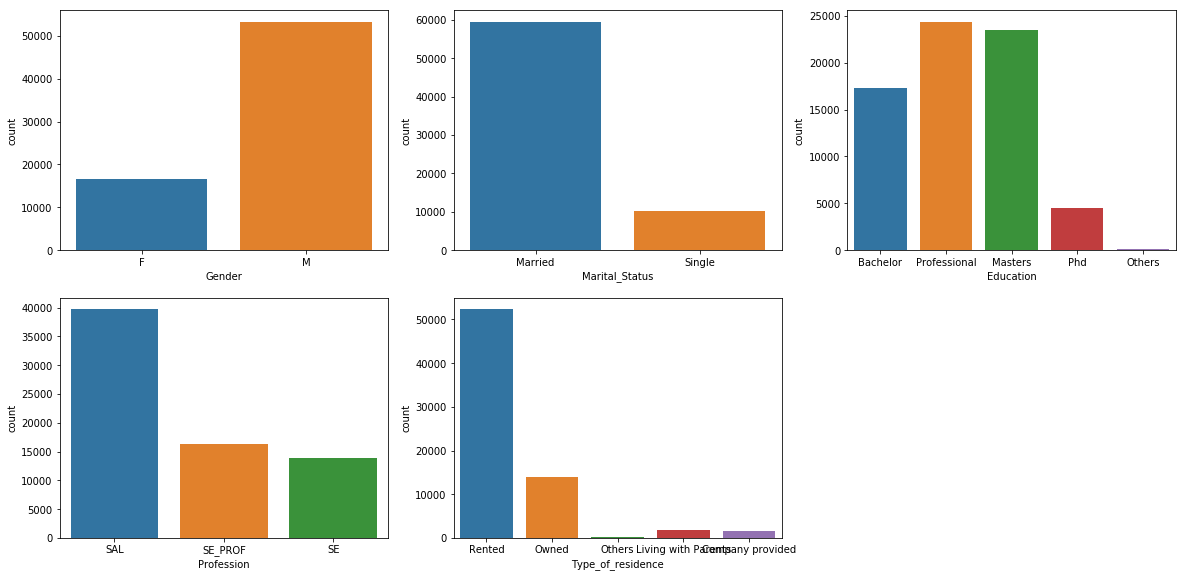

In [47]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.countplot(x="Gender", data=df);
plt.subplot(3,3,2)
sns.countplot(x="Marital_Status", data=df);
plt.subplot(3,3,3)
sns.countplot(x="Education", data=df);
plt.subplot(3,3,4)
sns.countplot(x="Profession", data=df);
plt.subplot(3,3,5)
sns.countplot(x="Type_of_residence", data=df);


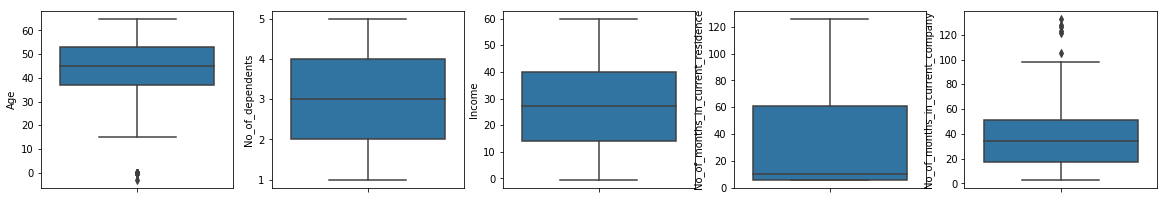

In [48]:
plt.figure(figsize=(20, 15))
plt.subplot(4,5,1)
sns.boxplot(y = 'Age', data = df)
plt.subplot(4,5,2)
sns.boxplot(y = 'No_of_dependents', data = df)
plt.subplot(4,5,3)
sns.boxplot(y = 'Income', data = df)
plt.subplot(4,5,4)
sns.boxplot(y = 'No_of_months_in_current_residence', data = df)
plt.subplot(4,5,5)
sns.boxplot(y = 'No_of_months_in_current_company', data = df)
plt.show()

##### Missing value Gender with max occurence

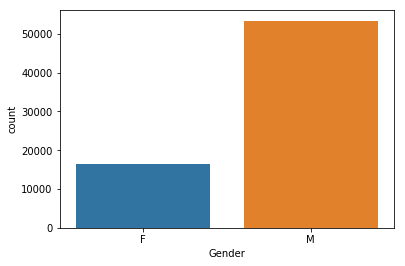

In [49]:
sns.countplot(x = "Gender", data = df)

In [50]:
# checking missing calues in Gender
nan_rows = df[df['Gender'].isnull()]
print ('missing values in Gender ',(len(nan_rows.Gender)))
# Replacing empty strings with values with maximum freq
df['Gender'] = df['Gender'].replace(np.nan, 'M')
# checking Gender column after replacing with max value
print ('checking missing values in Gender after replacing: ',len(df[df['Gender'].isnull()]))

missing values in Gender  2
checking missing values in Gender after replacing:  0


In [51]:
# missing value Gender
df['Gender'].value_counts()

M    53358
F    16506
Name: Gender, dtype: int64

##### Missing value Marital_Status with max occurence

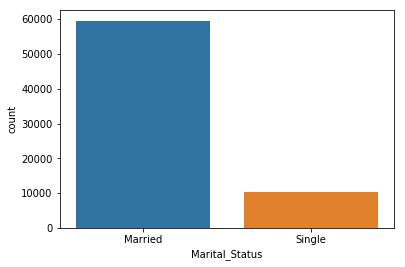

In [52]:
sns.countplot(x = "Marital_Status", data = df)

In [53]:
# checking missing calues in Marital_Status
nan_rows = df[df['Marital_Status'].isnull()]
print ('missing values in Marital_Status ',(len(nan_rows.Marital_Status)))
# Replacing empty strings with values with maximum freq
df['Marital_Status'] = df['Marital_Status'].replace(np.nan, 'Married')
# checking Marital_Status column after replacing with max value
print ('checking missing values in Marital_Status after replacing: ',len(df[df['Marital_Status'].isnull()]))

missing values in Marital_Status  6
checking missing values in Marital_Status after replacing:  0


In [54]:
# missing value Gender
df['Marital_Status'].value_counts()

Married    59548
Single     10316
Name: Marital_Status, dtype: int64

##### Missing value Education with max occurence 

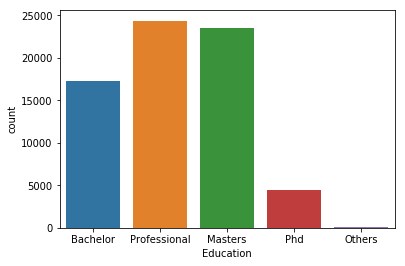

In [55]:
sns.countplot(x = "Education", data = df)

In [56]:
# checking missing calues in Education
nan_rows = df[df['Education'].isnull()]
print ('missing values in Education ',(len(nan_rows.Education)))
# Replacing empty strings with values with maximum freq
df['Education'] = df['Education'].replace(np.nan, 'Professional')
# checking Education column after replacing with max value
print ('checking missing values in Education after replacing: ',len(df[df['Education'].isnull()]))

missing values in Education  118
checking missing values in Education after replacing:  0


In [57]:
# missing value Education
df['Education'].value_counts()

Professional    24501
Masters         23481
Bachelor        17300
Phd              4463
Others            119
Name: Education, dtype: int64

##### Missing value Profession with max occurence 

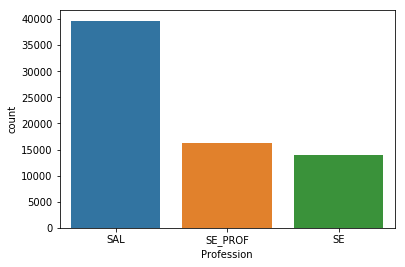

In [58]:
sns.countplot(x = "Profession", data = df)

In [59]:
# checking missing calues in Education
nan_rows = df[df['Profession'].isnull()]
print ('missing values in Profession ',(len(nan_rows.Profession)))
# Replacing empty strings with values with maximum freq
df['Profession'] = df['Profession'].replace(np.nan, 'SAL')
# checking Profession column after replacing with max value
print ('checking missing values in Profession after replacing: ',len(df[df['Profession'].isnull()]))

missing values in Profession  13
checking missing values in Profession after replacing:  0


In [60]:
# missing value Education
df['Profession'].value_counts()

SAL        39683
SE_PROF    16256
SE         13925
Name: Profession, dtype: int64

##### Missing value Type_of_residence with max occurence 

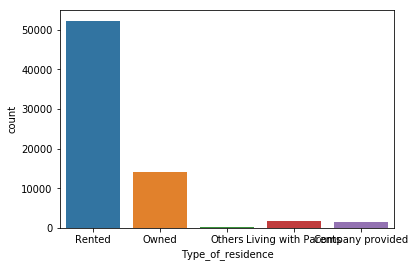

In [61]:
sns.countplot(x = "Type_of_residence", data = df)

In [62]:
# checking missing calues in Education
nan_rows = df[df['Type_of_residence'].isnull()]
print ('missing values in Type_of_residence ',(len(nan_rows.Type_of_residence)))
# Replacing empty strings with values with maximum freq
df['Type_of_residence'] = df['Type_of_residence'].replace(np.nan, 'Rented')
# checking Type_of_residence column after replacing with max value
print ('checking missing values in Type_of_residence after replacing: ',len(df[df['Type_of_residence'].isnull()]))

missing values in Type_of_residence  8
checking missing values in Type_of_residence after replacing:  0


In [63]:
# missing value Type_of_residence
df['Type_of_residence'].value_counts()

Rented                 52284
Owned                  14003
Living with Parents     1777
Company provided        1602
Others                   198
Name: Type_of_residence, dtype: int64

### For following columns we handle missing values by assigning median value to respective NA records.

##### Missing value No_of_dependents with median value 

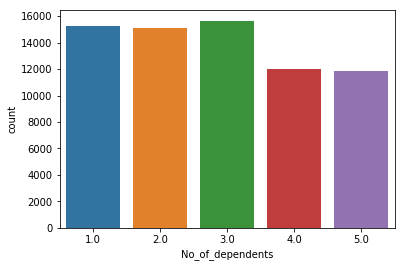

In [64]:
sns.countplot(x = "No_of_dependents", data = df)

In [65]:
# checling missing calues in No_of_dependents
nan_rows = df[df['No_of_dependents'].isnull()]
print ('missing values in No_of_dependents ',(len(nan_rows.No_of_dependents)))
# Removing NaN No_of_dependents rows
df = df[~np.isnan(df['No_of_dependents'])]
# checking No_of_dependents column after replacing with max value
print ('checking missing values in No_of_dependents after replacing: ',len(df[df['No_of_dependents'].isnull()]))

missing values in No_of_dependents  3
checking missing values in No_of_dependents after replacing:  0


##### Missing value trades_opened_6_months with median value 

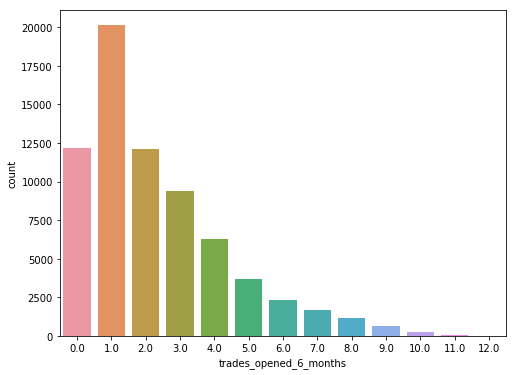

In [66]:
plt.figure(figsize=(8, 6))
sns.countplot(x = "trades_opened_6_months", data = df)

In [67]:
# checking missing calues in trades_opened_6_months
nan_rows = df[df['trades_opened_6_months'].isnull()]
print ('missing values in trades_opened_6_months ',(len(nan_rows.trades_opened_6_months)))
# Removing NaN No_of_dependents rows
df = df[~np.isnan(df['trades_opened_6_months'])]
# checking trades_opened_6_months column after replacing with max value
print ('checking missing values in trades_opened_6_months after replacing: ',len(df[df['trades_opened_6_months'].isnull()]))

missing values in trades_opened_6_months  1
checking missing values in trades_opened_6_months after replacing:  0


##### Missing value Presence_of_open_home_loan with median value 

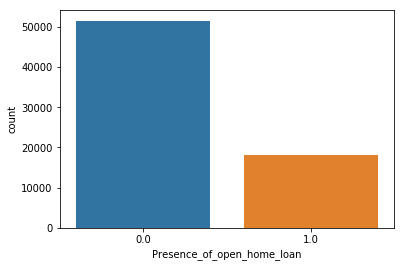

In [68]:
sns.countplot(x = "Presence_of_open_home_loan", data = df)

In [69]:
# checking missing calues in Presence_of_open_home_loan
nan_rows = df[df['Presence_of_open_home_loan'].isnull()]
print ('missing values in Presence_of_open_home_loan ',(len(nan_rows.Presence_of_open_home_loan)))
# Replacing empty strings with values with max value
df['Presence_of_open_home_loan'] = df['Presence_of_open_home_loan'].replace(np.nan, 0)
print ('checking missing values in Presence_of_open_home_loan after replacing: ',len(df[df['Presence_of_open_home_loan'].isnull()]))

missing values in Presence_of_open_home_loan  272
checking missing values in Presence_of_open_home_loan after replacing:  0


##### Missing value Outstanding_Balance with median value 

In [70]:
# checking missing calues in Outstanding_Balance
nan_rows = df[df['Outstanding_Balance'].isnull()]
print ('missing values in Outstanding_Balance ',(len(nan_rows.Outstanding_Balance)))
# Replacing empty strings with values with 0
df['Outstanding_Balance'] = df['Outstanding_Balance'].replace(np.nan, 0)
# checking Outstanding_Balance column after replacing with mean value
print ('checking missing values in Outstanding_Balance after replacing: ',len(df[df['Outstanding_Balance'].isnull()]))

missing values in Outstanding_Balance  272
checking missing values in Outstanding_Balance after replacing:  0


##### Missing value Avg_CC_Util_12_months with median value 

In [71]:
# checking missing calues in Avg_CC_Util_12_months
nan_rows = df[df['Avg_CC_Util_12_months'].isnull()]
print ('missing values in Avg_CC_Util_12_months ',(len(nan_rows.Avg_CC_Util_12_months)))
# no usage of CC by user. So lets assign value 0 to these avg-cc-utilization values
df['Avg_CC_Util_12_months'] = df['Avg_CC_Util_12_months'].replace(np.nan, 0)
# checking Avg_CC_Util_12_months column after replacing
print ('checking missing values in Avg_CC_Util_12_months after replacing: ',len(df[df['Avg_CC_Util_12_months'].isnull()]))

missing values in Avg_CC_Util_12_months  1022
checking missing values in Avg_CC_Util_12_months after replacing:  0


In [72]:
# checking null values in data_for_eda column wise
df.isna().sum()

Application_ID                       0
Age                                  0
Gender                               0
Marital_Status                       0
No_of_dependents                     0
Income                               0
Education                            0
Profession                           0
Type_of_residence                    0
No_of_months_in_current_residence    0
No_of_months_in_current_company      0
Performance_Tag                      0
90DPD_6_months                       0
60DPD_6_months                       0
30DPD_6_months                       0
90DPD_12_months                      0
60DPD_12_months                      0
30DPD_12_months                      0
Avg_CC_Util_12_months                0
trades_opened_6_months               0
trades_opened_12_months              0
PL_trades_opened_6_months            0
PL_trades_opened_12_months           0
Inquiries_6_months                   0
Inquiries_12_months                  0
Presence_of_open_home_loa

In [73]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69860 entries, 0 to 71288
Data columns (total 29 columns):
Application_ID                       69860 non-null int64
Age                                  69860 non-null int64
Gender                               69860 non-null object
Marital_Status                       69860 non-null object
No_of_dependents                     69860 non-null float64
Income                               69860 non-null float64
Education                            69860 non-null object
Profession                           69860 non-null object
Type_of_residence                    69860 non-null object
No_of_months_in_current_residence    69860 non-null int64
No_of_months_in_current_company      69860 non-null int64
Performance_Tag                      69860 non-null float64
90DPD_6_months                       69860 non-null int64
60DPD_6_months                       69860 non-null int64
30DPD_6_months                       69860 non-null int64
90DPD_12_m

##### no missing values let move to EDA and remove outliers 

In [74]:
# Checking for outliers in the remaining continuous variables
num_credit = df[['Age','Income','No_of_months_in_current_residence','No_of_months_in_current_company',
'Performance_Tag','90DPD_6_months','60DPD_6_months','30DPD_6_months','90DPD_12_months','60DPD_12_months','30DPD_12_months',
'trades_opened_12_months','PL_trades_opened_6_months','PL_trades_opened_12_months',
'Inquiries_6_months','Inquiries_12_months','Total_No_of_Trades',
'Presence_of_open_auto_loan']]

In [75]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_credit.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Age,Income,No_of_months_in_current_residence,No_of_months_in_current_company,Performance_Tag,90DPD_6_months,60DPD_6_months,30DPD_6_months,90DPD_12_months,60DPD_12_months,30DPD_12_months,trades_opened_12_months,PL_trades_opened_6_months,PL_trades_opened_12_months,Inquiries_6_months,Inquiries_12_months,Total_No_of_Trades,Presence_of_open_auto_loan
count,69860.000000,69860.000000,69860.000000,69860.000000,69860.000000,69860.000000,69860.000000,69860.000000,69860.000000,69860.000000,69860.000000,69860.000000,69860.000000,69860.000000,69860.000000,69860.000000,69860.000000,69860.00000
mean,44.996679,27.409011,34.605926,34.199714,0.042184,0.248955,0.391626,0.523433,0.414801,0.603350,0.733810,5.785299,1.189679,2.363556,1.758045,3.525165,8.175236,0.08487
std,9.928506,15.475333,36.845022,20.349555,0.201011,0.505629,0.771774,1.000613,0.763452,1.021693,1.243025,5.095541,1.352720,2.423712,1.985105,3.611858,7.153119,0.27869
min,-3.000000,-0.500000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,37.000000,14.000000,6.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000
50%,45.000000,27.000000,10.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,1.000000,3.000000,6.000000,0.00000
75%,53.000000,40.000000,61.000000,51.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,2.000000,4.000000,3.000000,5.000000,10.000000,0.00000
90%,58.000000,49.000000,98.000000,62.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,13.000000,3.000000,6.000000,5.000000,9.000000,20.000000,0.00000
95%,62.000000,54.000000,110.000000,68.000000,0.000000,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,16.000000,4.000000,7.000000,6.000000,11.000000,25.000000,1.00000
99%,65.000000,59.000000,122.000000,74.000000,1.000000,2.000000,3.000000,4.000000,3.000000,4.000000,5.000000,21.000000,5.000000,9.000000,8.000000,15.000000,31.000000,1.00000


### Handling Credit outlier value and invalid values

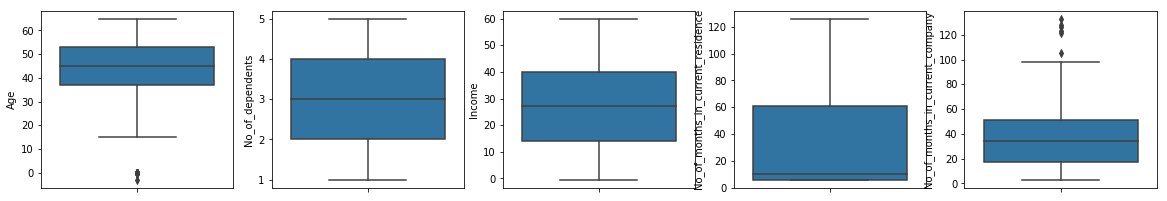

In [76]:
plt.figure(figsize=(20, 15))
plt.subplot(4,5,1)
sns.boxplot(y = 'Age', data = df)
plt.subplot(4,5,2)
sns.boxplot(y = 'No_of_dependents', data = df)
plt.subplot(4,5,3)
sns.boxplot(y = 'Income', data = df)
plt.subplot(4,5,4)
sns.boxplot(y = 'No_of_months_in_current_residence', data = df)
plt.subplot(4,5,5)
sns.boxplot(y = 'No_of_months_in_current_company', data = df)
plt.show()

#### Age

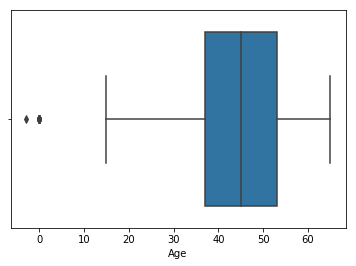

In [77]:
sns.boxplot(x='Age', data=df)
plt.show()

In [78]:
#Invalid negative/zero value for age column populated for some row i.e. 0, -3
age_values = df[df['Age'] < 10]
print ('unique values : ',age_values.Age.unique())
print ('number of values : ',age_values.Age.count())

unique values :  [ 0 -3]
number of values :  19


In [79]:
### So age value substituted with median values where invalid. 
df['Age']=df['Age'].replace(0,df['Age'].mean())
df['Age']=df['Age'].replace(-3,df['Age'].mean())

##### Income

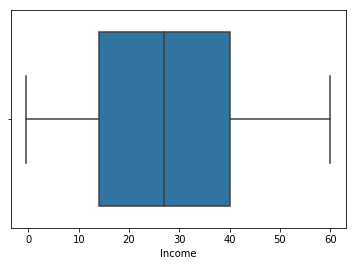

In [80]:
sns.boxplot(x='Income', data=df)
plt.show()

In [81]:
#Invalid negative/zero value for Income column populated for some row
income_values = df[df['Income'] < 0]
print ('unique values : ',income_values.Income.unique())
print ('number of values : ',income_values.Income.count())

unique values :  [-0.5]
number of values :  81


In [82]:
# So Income value substituted with 0 values where invalid. 
df['Income']=df['Income'].replace(-0.5,0)

###### Calculate first(q1) and third quartile(q3)
###### Find interquartile range (q3-q1)
###### Find lower bound q1*1.5
###### Find upper bound q3*1.5
###### Anything that lies outside of lower and upper bound is an outlier
###### lower_bound = q1 - (1.5 * q1)
###### upper_bound = q3 + (1.5 * q3)

#####  No_of_months_in_current_residence

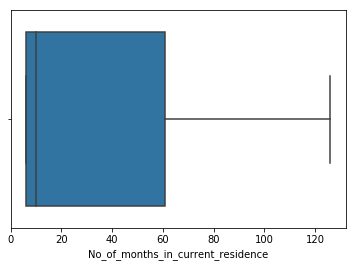

In [83]:
sns.boxplot(x='No_of_months_in_current_residence', data=df)
plt.show()

In [84]:
Q1 = df['No_of_months_in_current_residence'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['No_of_months_in_current_residence'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['No_of_months_in_current_residence'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 6.0
third quartile(q3) 61.0
interquartile range (q3-q1) 82.5
upper_bound =  0.75    143.5
Name: No_of_months_in_current_residence, dtype: float64


#####  No_of_months_in_current_company

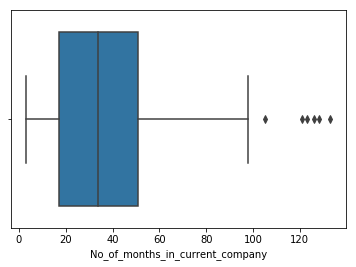

In [85]:
sns.boxplot(x='No_of_months_in_current_company', data=df)
plt.show()

In [86]:
Q1 = df['No_of_months_in_current_company'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['No_of_months_in_current_company'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['No_of_months_in_current_company'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 17.0
third quartile(q3) 51.0
interquartile range (q3-q1) 51.0
upper_bound =  0.75    102.0
Name: No_of_months_in_current_company, dtype: float64


In [87]:
df.loc[df['No_of_months_in_current_company'] > 102, 'No_of_months_in_current_company'] = 102

### Handling Demographic DD outlier numeric value

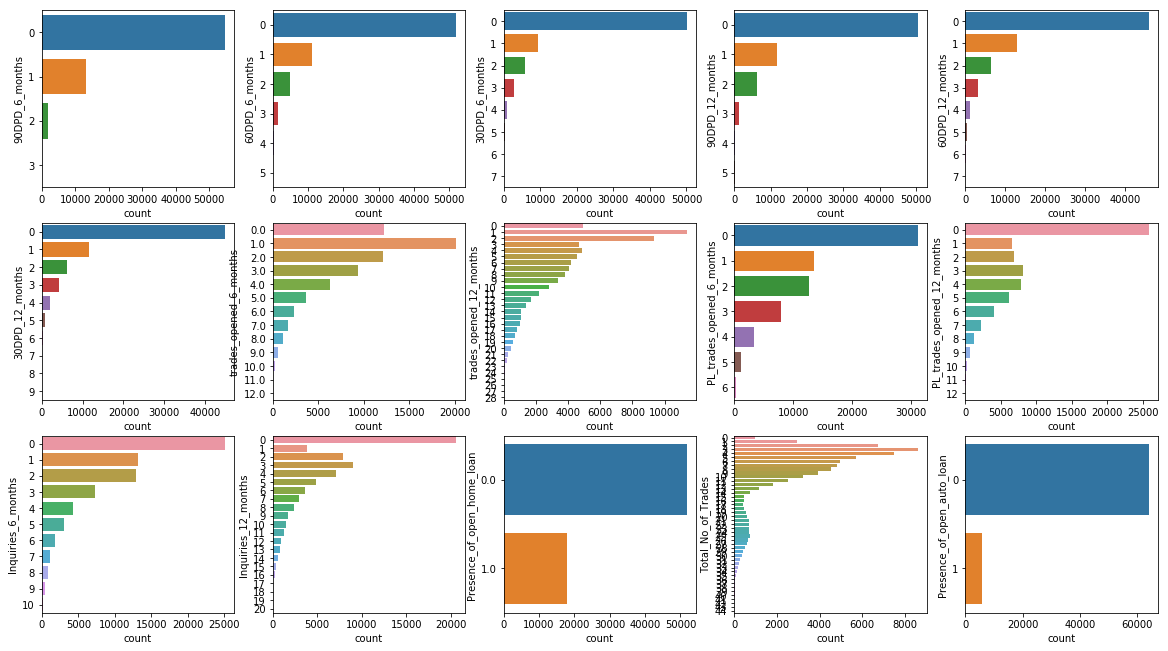

In [88]:
plt.figure(figsize=(20, 15))
plt.subplot(4,5,1)
sns.countplot(y = '90DPD_6_months', data = df)
plt.subplot(4,5,2)
sns.countplot(y = '60DPD_6_months', data = df)
plt.subplot(4,5,3)
sns.countplot(y = '30DPD_6_months', data = df)
plt.subplot(4,5,4)
sns.countplot(y = '90DPD_12_months', data = df)
plt.subplot(4,5,5)
sns.countplot(y = '60DPD_12_months', data = df)
plt.subplot(4,5,6)
sns.countplot(y = '30DPD_12_months', data = df)
plt.subplot(4,5,7)
sns.countplot(y = 'trades_opened_6_months', data = df)
plt.subplot(4,5,8)
sns.countplot(y = 'trades_opened_12_months', data = df)
plt.subplot(4,5,9)
sns.countplot(y = 'PL_trades_opened_6_months', data = df)
plt.subplot(4,5,10)
sns.countplot(y = 'PL_trades_opened_12_months', data = df)
plt.subplot(4,5,11)
sns.countplot(y = 'Inquiries_6_months', data = df)
plt.subplot(4,5,12)
sns.countplot(y = 'Inquiries_12_months', data = df)
plt.subplot(4,5,13)
sns.countplot(y = 'Presence_of_open_home_loan', data = df)
plt.subplot(4,5,14)
sns.countplot(y = 'Total_No_of_Trades', data = df)
plt.subplot(4,5,15)
sns.countplot(y = 'Presence_of_open_auto_loan', data = df)
plt.show()

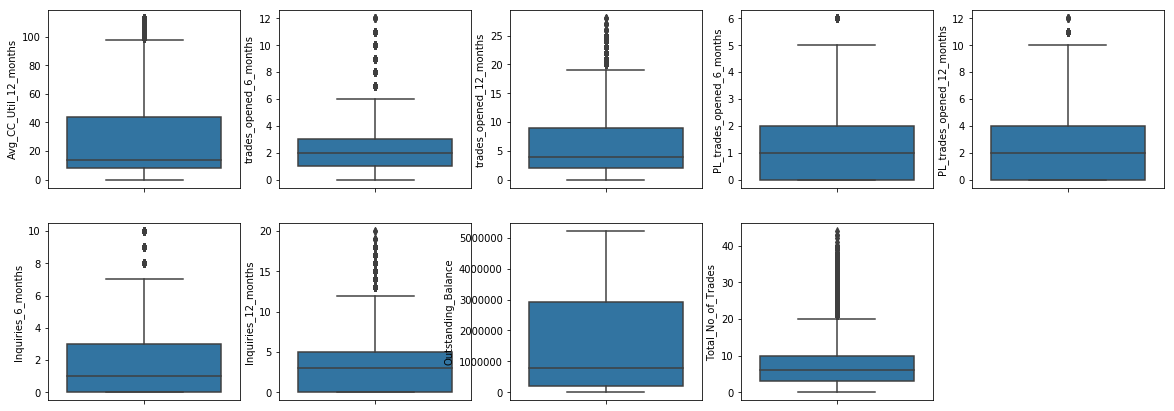

In [89]:
plt.figure(figsize=(20, 15))
plt.subplot(4,5,1)
sns.boxplot(y = 'Avg_CC_Util_12_months', data = df)
plt.subplot(4,5,2)
sns.boxplot(y = 'trades_opened_6_months', data = df)
plt.subplot(4,5,3)
sns.boxplot(y = 'trades_opened_12_months', data = df)
plt.subplot(4,5,4)
sns.boxplot(y = 'PL_trades_opened_6_months', data = df)
plt.subplot(4,5,5)
sns.boxplot(y = 'PL_trades_opened_12_months', data = df)
plt.subplot(4,5,6)
sns.boxplot(y = 'Inquiries_6_months', data = df)
plt.subplot(4,5,7)
sns.boxplot(y = 'Inquiries_12_months', data = df)
plt.subplot(4,5,8)
sns.boxplot(y = 'Outstanding_Balance', data = df)
plt.subplot(4,5,9)
sns.boxplot(y = 'Total_No_of_Trades', data = df)
plt.show()

#####  trades_opened_6_months

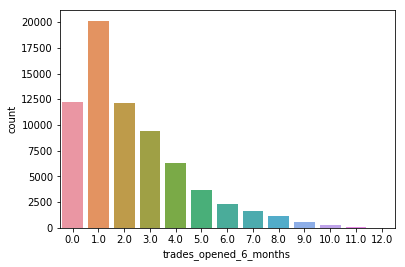

In [90]:
# plot time slot w.r.t. Presence_of_open_auto_loan the most critical problems
sns.countplot(x = 'trades_opened_6_months', data = df)

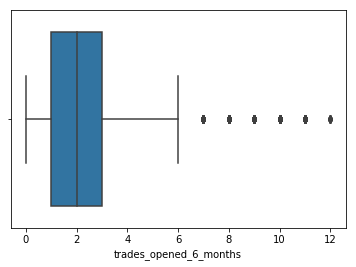

In [91]:
sns.boxplot(x='trades_opened_6_months', data=df)
plt.show()

In [92]:
Q1 = df['trades_opened_6_months'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['trades_opened_6_months'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['trades_opened_6_months'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 1.0
third quartile(q3) 3.0
interquartile range (q3-q1) 3.0
upper_bound =  0.75    6.0
Name: trades_opened_6_months, dtype: float64


In [93]:
df.loc[df['trades_opened_6_months'] > 6, 'trades_opened_6_months'] = 6

#####  trades_opened_12_months

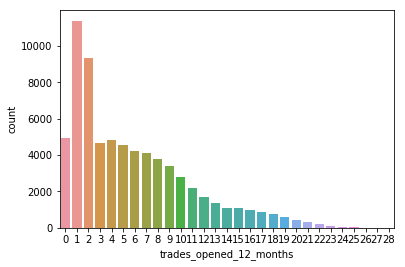

In [94]:
# plot time slot w.r.t. Presence_of_open_auto_loan the most critical problems
sns.countplot(x = 'trades_opened_12_months', data = df)

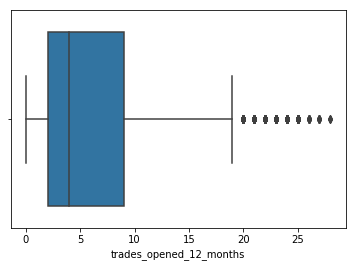

In [95]:
sns.boxplot(x='trades_opened_12_months', data=df)
plt.show()

In [96]:
Q1 = df['trades_opened_12_months'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['trades_opened_12_months'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['trades_opened_12_months'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 2.0
third quartile(q3) 9.0
interquartile range (q3-q1) 10.5
upper_bound =  0.75    19.5
Name: trades_opened_12_months, dtype: float64


In [97]:
df.loc[df['trades_opened_12_months'] > 19, 'trades_opened_12_months'] = 19

#####  Avg_CC_Util_12_months

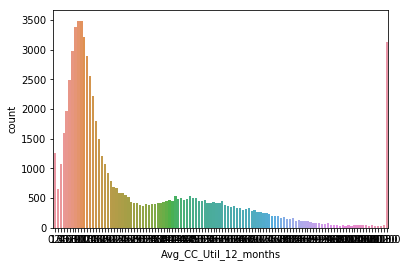

In [98]:
# plot time slot w.r.t. Presence_of_open_auto_loan the most critical problems
sns.countplot(x = 'Avg_CC_Util_12_months', data = df)

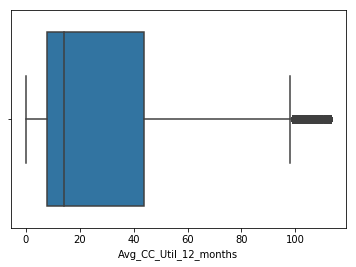

In [99]:
sns.boxplot(x='Avg_CC_Util_12_months', data=df)
plt.show()

In [100]:
Q1 = df['Avg_CC_Util_12_months'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['Avg_CC_Util_12_months'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['Avg_CC_Util_12_months'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 8.0
third quartile(q3) 44.0
interquartile range (q3-q1) 54.0
upper_bound =  0.75    98.0
Name: Avg_CC_Util_12_months, dtype: float64


In [101]:
df.loc[df['Avg_CC_Util_12_months'] > 98, 'Avg_CC_Util_12_months'] = 98

#####  PL_trades_opened_6_months

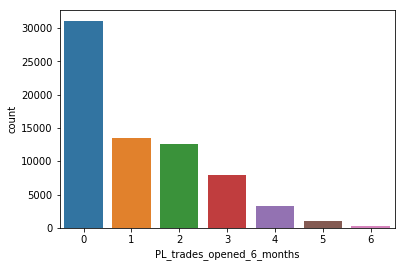

In [102]:
# plot time slot w.r.t. Presence_of_open_auto_loan the most critical problems
sns.countplot(x = 'PL_trades_opened_6_months', data = df)

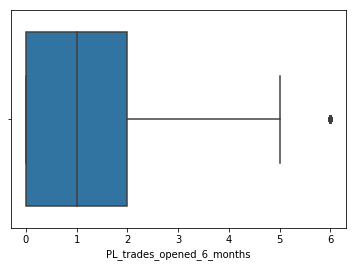

In [103]:
sns.boxplot(x='PL_trades_opened_6_months', data=df)
plt.show()

In [104]:
Q1 = df['PL_trades_opened_6_months'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['PL_trades_opened_6_months'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['PL_trades_opened_6_months'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 0.0
third quartile(q3) 2.0
interquartile range (q3-q1) 3.0
upper_bound =  0.75    5.0
Name: PL_trades_opened_6_months, dtype: float64


In [105]:
df.loc[df['PL_trades_opened_6_months'] > 5, 'PL_trades_opened_6_months'] = 5

#####  PL_trades_opened_12_months

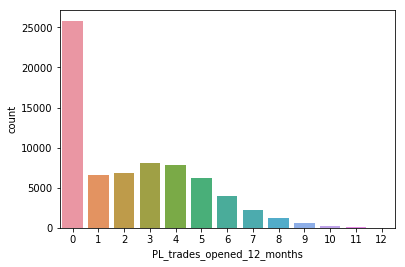

In [106]:
# plot time slot w.r.t. Presence_of_open_auto_loan the most critical problems
sns.countplot(x = 'PL_trades_opened_12_months', data = df)

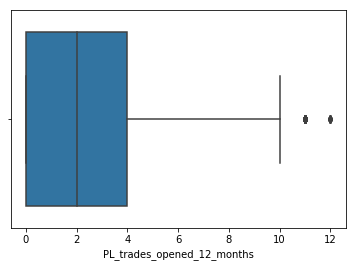

In [107]:
sns.boxplot(x='PL_trades_opened_12_months', data=df)
plt.show()

In [108]:
Q1 = df['PL_trades_opened_12_months'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['PL_trades_opened_12_months'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['PL_trades_opened_12_months'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 0.0
third quartile(q3) 4.0
interquartile range (q3-q1) 6.0
upper_bound =  0.75    10.0
Name: PL_trades_opened_12_months, dtype: float64


In [109]:
df.loc[df['PL_trades_opened_12_months'] > 10, 'PL_trades_opened_12_months'] = 10

#####  Inquiries_6_months

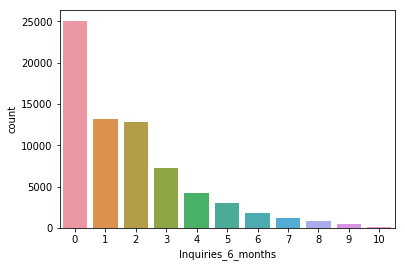

In [110]:
# plot time slot w.r.t. Presence_of_open_auto_loan the most critical problems
sns.countplot(x = 'Inquiries_6_months', data = df)

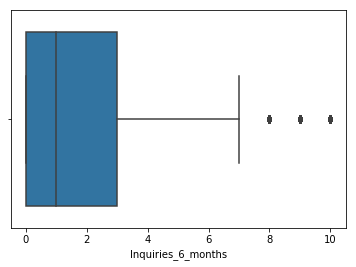

In [111]:
sns.boxplot(x='Inquiries_6_months', data=df)
plt.show()

In [112]:
Q1 = df['Inquiries_6_months'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['Inquiries_6_months'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['Inquiries_6_months'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 0.0
third quartile(q3) 3.0
interquartile range (q3-q1) 4.5
upper_bound =  0.75    7.5
Name: Inquiries_6_months, dtype: float64


In [113]:
df.loc[df['Inquiries_6_months'] > 7, 'Inquiries_6_months'] = 7

#####  Inquiries_12_months

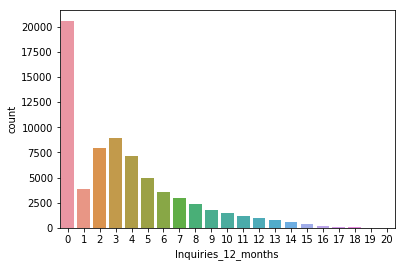

In [114]:
# plot time slot w.r.t. Presence_of_open_auto_loan the most critical problems
sns.countplot(x = 'Inquiries_12_months', data = df)

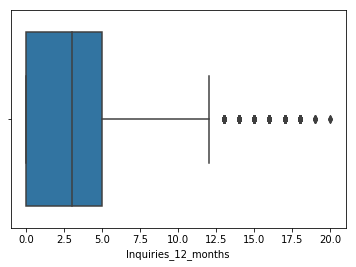

In [115]:
sns.boxplot(x='Inquiries_12_months', data=df)
plt.show()

In [116]:
Q1 = df['Inquiries_12_months'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['Inquiries_12_months'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['Inquiries_12_months'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 0.0
third quartile(q3) 5.0
interquartile range (q3-q1) 7.5
upper_bound =  0.75    12.5
Name: Inquiries_12_months, dtype: float64


In [117]:
df.loc[df['Inquiries_12_months'] > 12, 'Inquiries_12_months'] = 12

#####  Total_No_of_Trades

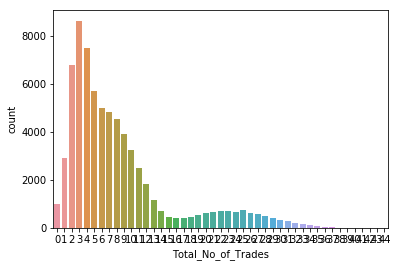

In [118]:
# plot time slot w.r.t. Presence_of_open_auto_loan the most critical problems
sns.countplot(x = 'Total_No_of_Trades', data = df)

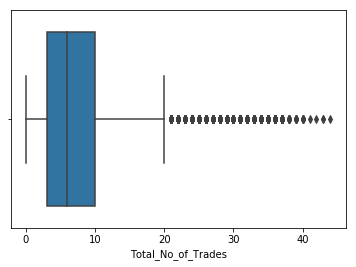

In [119]:
sns.boxplot(x='Total_No_of_Trades', data=df)
plt.show()

In [120]:
Q1 = df['Total_No_of_Trades'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['Total_No_of_Trades'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['Total_No_of_Trades'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 3.0
third quartile(q3) 10.0
interquartile range (q3-q1) 10.5
upper_bound =  0.75    20.5
Name: Total_No_of_Trades, dtype: float64


In [121]:
df.loc[df['Total_No_of_Trades'] > 20, 'Total_No_of_Trades'] = 20

#####  60DPD_6_months

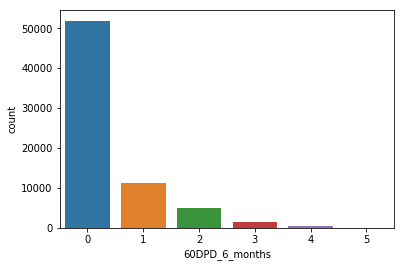

In [122]:
# plot time slot w.r.t. Presence_of_open_auto_loan the most critical problems
sns.countplot(x = '60DPD_6_months', data = df)

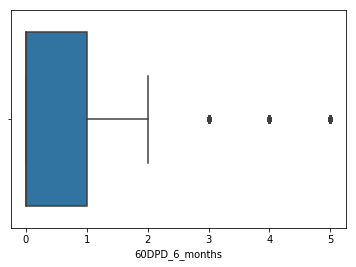

In [123]:
sns.boxplot(x='60DPD_6_months', data=df)
plt.show()

In [124]:
Q1 = df['60DPD_6_months'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['60DPD_6_months'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['60DPD_6_months'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 0.0
third quartile(q3) 1.0
interquartile range (q3-q1) 1.5
upper_bound =  0.75    2.5
Name: 60DPD_6_months, dtype: float64


In [125]:
df.loc[df['60DPD_6_months'] > 2, '60DPD_6_months'] = 2

#####  30DPD_6_months

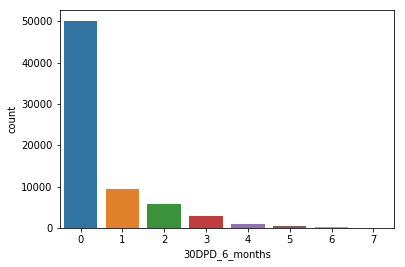

In [126]:
# plot time slot w.r.t. 30DPD_6_months the most critical problems
sns.countplot(x = '30DPD_6_months', data = df)

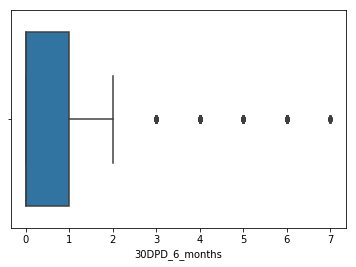

In [127]:
sns.boxplot(x='30DPD_6_months', data=df)
plt.show()

In [128]:
Q1 = df['30DPD_6_months'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['30DPD_6_months'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['30DPD_6_months'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 0.0
third quartile(q3) 1.0
interquartile range (q3-q1) 1.5
upper_bound =  0.75    2.5
Name: 30DPD_6_months, dtype: float64


In [129]:
df.loc[df['30DPD_6_months'] > 2, '30DPD_6_months'] = 2

#####  90DPD_12_months

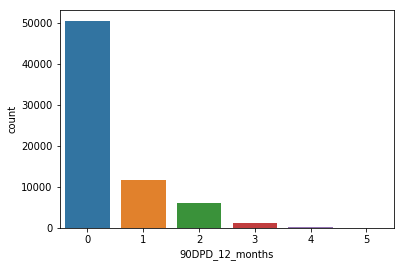

In [130]:
# plot time slot w.r.t. 90DPD_12_months the most critical problems
sns.countplot(x = '90DPD_12_months', data = df)

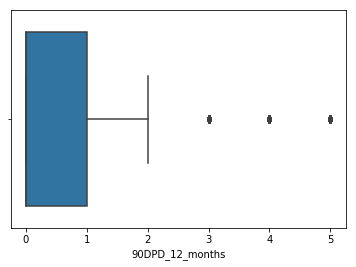

In [131]:
sns.boxplot(x='90DPD_12_months', data=df)
plt.show()

In [132]:
Q1 = df['90DPD_12_months'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['90DPD_12_months'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['90DPD_12_months'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 0.0
third quartile(q3) 1.0
interquartile range (q3-q1) 1.5
upper_bound =  0.75    2.5
Name: 90DPD_12_months, dtype: float64


In [133]:
df.loc[df['90DPD_12_months'] > 2, '90DPD_12_months'] = 2

#####  60DPD_12_months

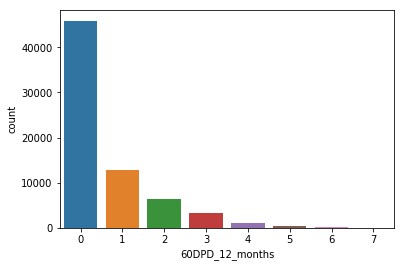

In [134]:
# plot time slot w.r.t. 60DPD_12_months the most critical problems
sns.countplot(x = '60DPD_12_months', data = df)

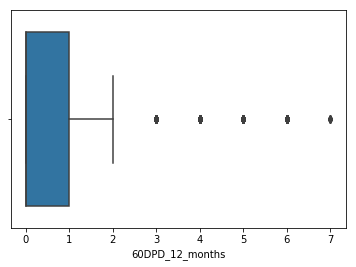

In [135]:
sns.boxplot(x='60DPD_12_months', data=df)
plt.show()

In [136]:
Q1 = df['60DPD_12_months'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['60DPD_12_months'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['60DPD_12_months'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 0.0
third quartile(q3) 1.0
interquartile range (q3-q1) 1.5
upper_bound =  0.75    2.5
Name: 60DPD_12_months, dtype: float64


In [137]:
df.loc[df['60DPD_12_months'] > 2, '60DPD_12_months'] = 2

#####  30DPD_12_months

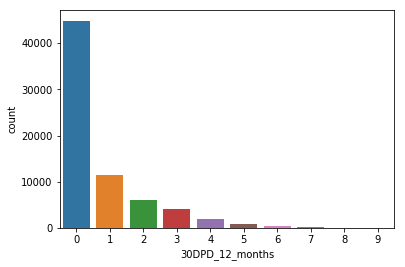

In [138]:
# plot time slot w.r.t. 30DPD_12_months the most critical problems
sns.countplot(x = '30DPD_12_months', data = df)

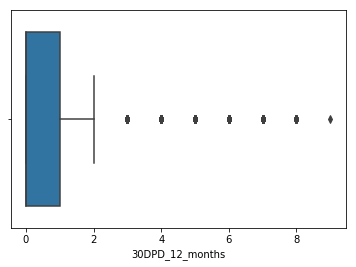

In [139]:
sns.boxplot(x='30DPD_12_months', data=df)
plt.show()

In [140]:
Q1 = df['30DPD_12_months'].quantile(0.25)
print('first quartile(q1)',Q1)
Q3 = df['30DPD_12_months'].quantile(0.75)
print('third quartile(q3)',Q3)
IQR=Q3-Q1
H=1.5*IQR
print('interquartile range (q3-q1)',H)
upper_bound=df['30DPD_12_months'].quantile([.75])+H
print('upper_bound = ',upper_bound)

first quartile(q1) 0.0
third quartile(q3) 1.0
interquartile range (q3-q1) 1.5
upper_bound =  0.75    2.5
Name: 30DPD_12_months, dtype: float64


In [141]:
df.loc[df['30DPD_12_months'] > 2, '30DPD_12_months'] = 2

## Univariate analysis

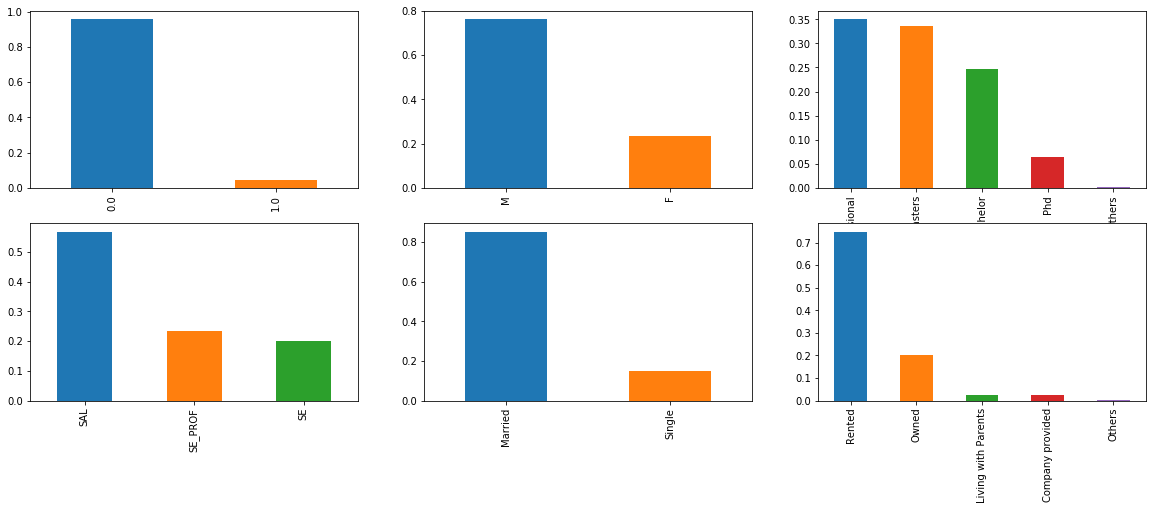

In [142]:
plt.figure(figsize=(20, 15))
plt.subplot(4,3,1)
(df['Performance_Tag'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(4,3,2)
(df['Gender'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(4,3,3)
(df['Education'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(4,3,4)
(df['Profession'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(4,3,5)
(df['Marital_Status'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(4,3,6)
(df['Type_of_residence'].value_counts().head(10)/len(df)).plot.bar()
plt.show()

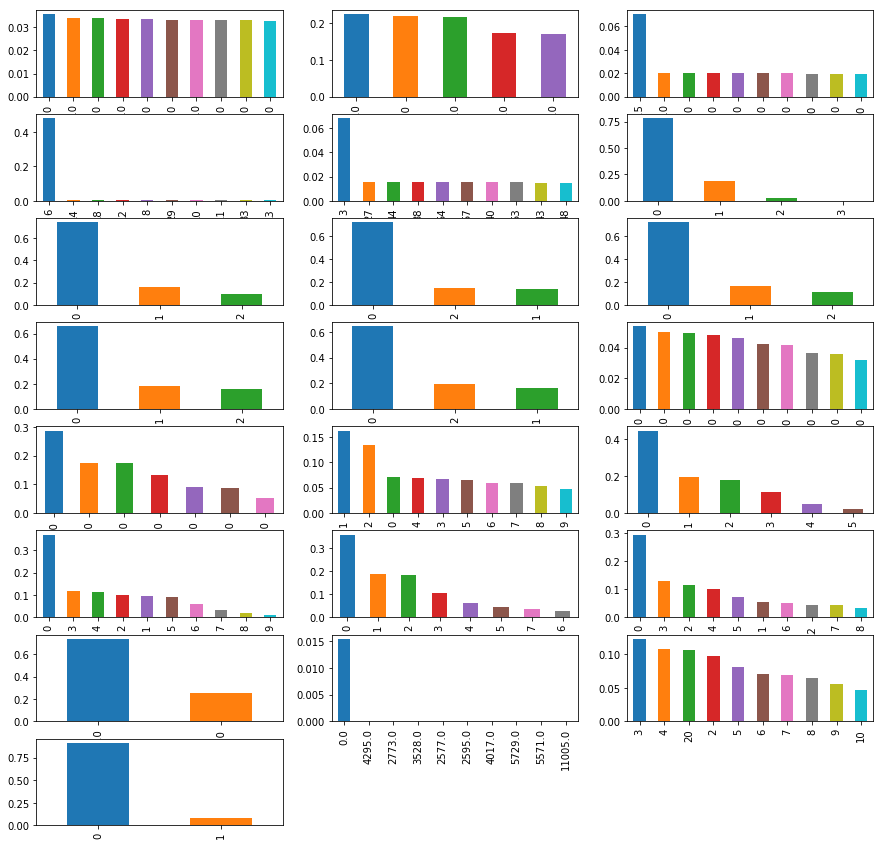

In [143]:
plt.figure(figsize=(15, 15))
plt.subplot(8,3,1)
(df['Age'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,2)
(df['No_of_dependents'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,3)
(df['Income'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,4)
(df['No_of_months_in_current_residence'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,5)
(df['No_of_months_in_current_company'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,6)
(df['90DPD_6_months'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,7)
(df['60DPD_6_months'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,8)
(df['30DPD_6_months'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,9)
(df['90DPD_12_months'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,10)
(df['60DPD_12_months'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,11)
(df['30DPD_12_months'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,12)
(df['Avg_CC_Util_12_months'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,13)
(df['trades_opened_6_months'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,14)
(df['trades_opened_12_months'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,15)
(df['PL_trades_opened_6_months'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,16)
(df['PL_trades_opened_12_months'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,17)
(df['Inquiries_6_months'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,18)
(df['Inquiries_12_months'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,19)
(df['Presence_of_open_home_loan'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,20)
(df['Outstanding_Balance'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,21)
(df['Total_No_of_Trades'].value_counts().head(10)/len(df)).plot.bar()
plt.subplot(8,3,22)
(df['Presence_of_open_auto_loan'].value_counts().head(10)/len(df)).plot.bar()
plt.show()

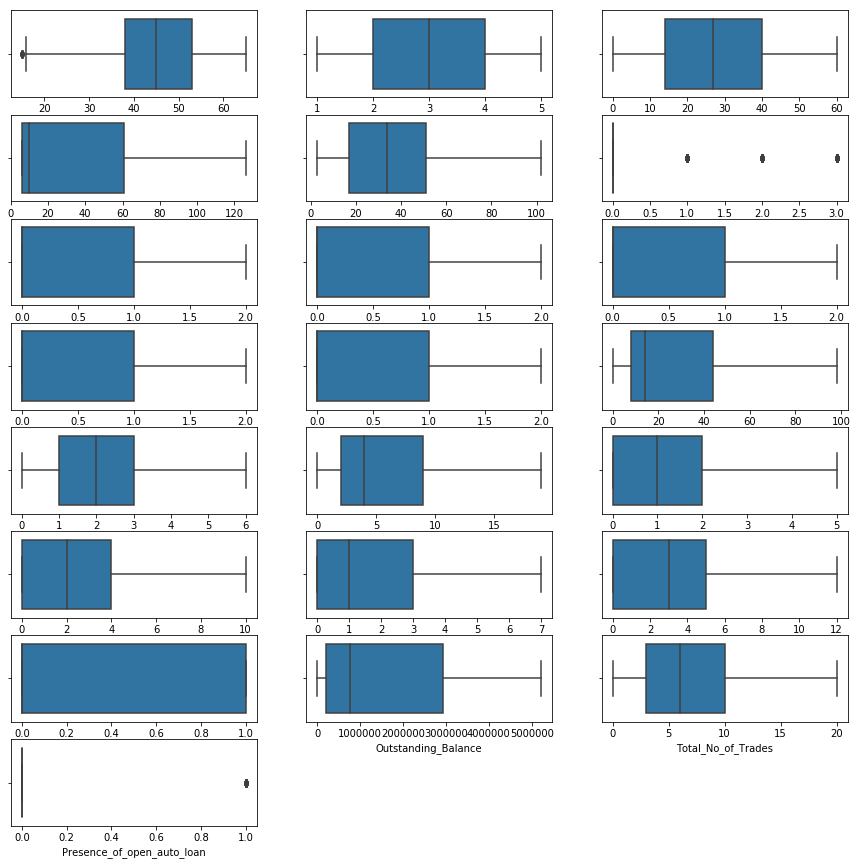

In [144]:
plt.figure(figsize=(15, 15))
plt.subplot(8,3,1)
sns.boxplot(x='Age', data=df)
plt.subplot(8,3,2)
sns.boxplot(x='No_of_dependents', data=df)
plt.subplot(8,3,3)
sns.boxplot(x='Income', data=df)
plt.subplot(8,3,4)
sns.boxplot(x='No_of_months_in_current_residence', data=df)
plt.subplot(8,3,5)
sns.boxplot(x='No_of_months_in_current_company', data=df)
plt.subplot(8,3,6)
sns.boxplot(x='90DPD_6_months', data=df)
plt.subplot(8,3,7)
sns.boxplot(x='60DPD_6_months', data=df)
plt.subplot(8,3,8)
sns.boxplot(x='30DPD_6_months', data=df)
plt.subplot(8,3,9)
sns.boxplot(x='90DPD_12_months', data=df)
plt.subplot(8,3,10)
sns.boxplot(x='60DPD_12_months', data=df)
plt.subplot(8,3,11)
sns.boxplot(x='30DPD_12_months', data=df)
plt.subplot(8,3,12)
sns.boxplot(x='Avg_CC_Util_12_months', data=df)
plt.subplot(8,3,13)
sns.boxplot(x='trades_opened_6_months', data=df)
plt.subplot(8,3,14)
sns.boxplot(x='trades_opened_12_months', data=df)
plt.subplot(8,3,15)
sns.boxplot(x='PL_trades_opened_6_months', data=df)
plt.subplot(8,3,16)
sns.boxplot(x='PL_trades_opened_12_months', data=df)
plt.subplot(8,3,17)
sns.boxplot(x='Inquiries_6_months', data=df)
plt.subplot(8,3,18)
sns.boxplot(x='Inquiries_12_months', data=df)
plt.subplot(8,3,19)
sns.boxplot(x='Presence_of_open_home_loan', data=df)
plt.subplot(8,3,20)
sns.boxplot(x='Outstanding_Balance', data=df)
plt.subplot(8,3,21)
sns.boxplot(x='Total_No_of_Trades', data=df)
plt.subplot(8,3,22)
sns.boxplot(x='Presence_of_open_auto_loan', data=df)
plt.show()

In [145]:
## Age - most users are in late 30 to early 50 age range.
## Income - Most users are in 15 to 40 income range.
## No_of_months_in_current_company - Most users are new job holders with 0-5yr experience.
## 90DPD_6_months - Most people have no such overdues Among the very less people who have  90 days overdue
## 60DPD_6_months - Most people have no such overdues repeating offenders population size keep on decreasing with occurances of overdue
## 30DPD_6_months - Most people have no such overdues repeating offenders population size keep on decreasing with occurances of overdue
## 90DPD_12_months - Most people have no such overdues Among the very less people who have  90 days overdue, repeating offenders population size is very very small.
## 60DPD_12_months - Most people have no such overdues repeating offenders population size keep on decreasing with occurances of overdue
## 30DPD_12_months - Most people have no such overdues repeating offenders population size keep on decreasing with occurances of overdue
## Avg_CC_Util_12_months - most users are utilizing only upto 20% of card upper limit, population size with proper 25 to 60 % card utilization is similar
## trades_opened_6_months - most users have 0-4 trades opened in last 6 mon
## trades_opened_12_months - most users have 0-10 trades opened in last 12 mon.
## PL_trades_opened_6_months - most users have 0-3 PL opened in last 12 mon
## PL_trades_opened_12_months - most users have 0-6 trades opened in last 12 mon.
## Inquiries_6_months - most users have 0-4 trades opened in last 6 mon.
## Inquiries_12_months - most users have 0-5 trades opened in last 12 mon.
## Outstanding_Balance - 0-200000 range higher no of users 300k upwards lower no of users most users are starting to repay their loans
## Total_No_of_Trades - most users have 0-10 trades in total


## Bi/multi-variate analysis

C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


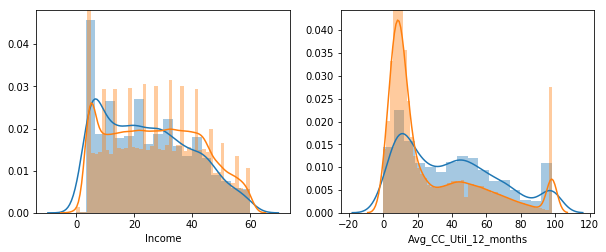

In [146]:
plt.figure(figsize=(10, 35))
plt.subplot(8,2,1)
sns.distplot(df.loc[(df.Performance_Tag == 1)].Income)
sns.distplot(df.loc[(df.Performance_Tag == 0)].Income)

plt.subplot(8,2,2)
sns.distplot(df.loc[(df.Performance_Tag == 1)].Avg_CC_Util_12_months)
sns.distplot(df.loc[(df.Performance_Tag == 0)].Avg_CC_Util_12_months)
plt.show()

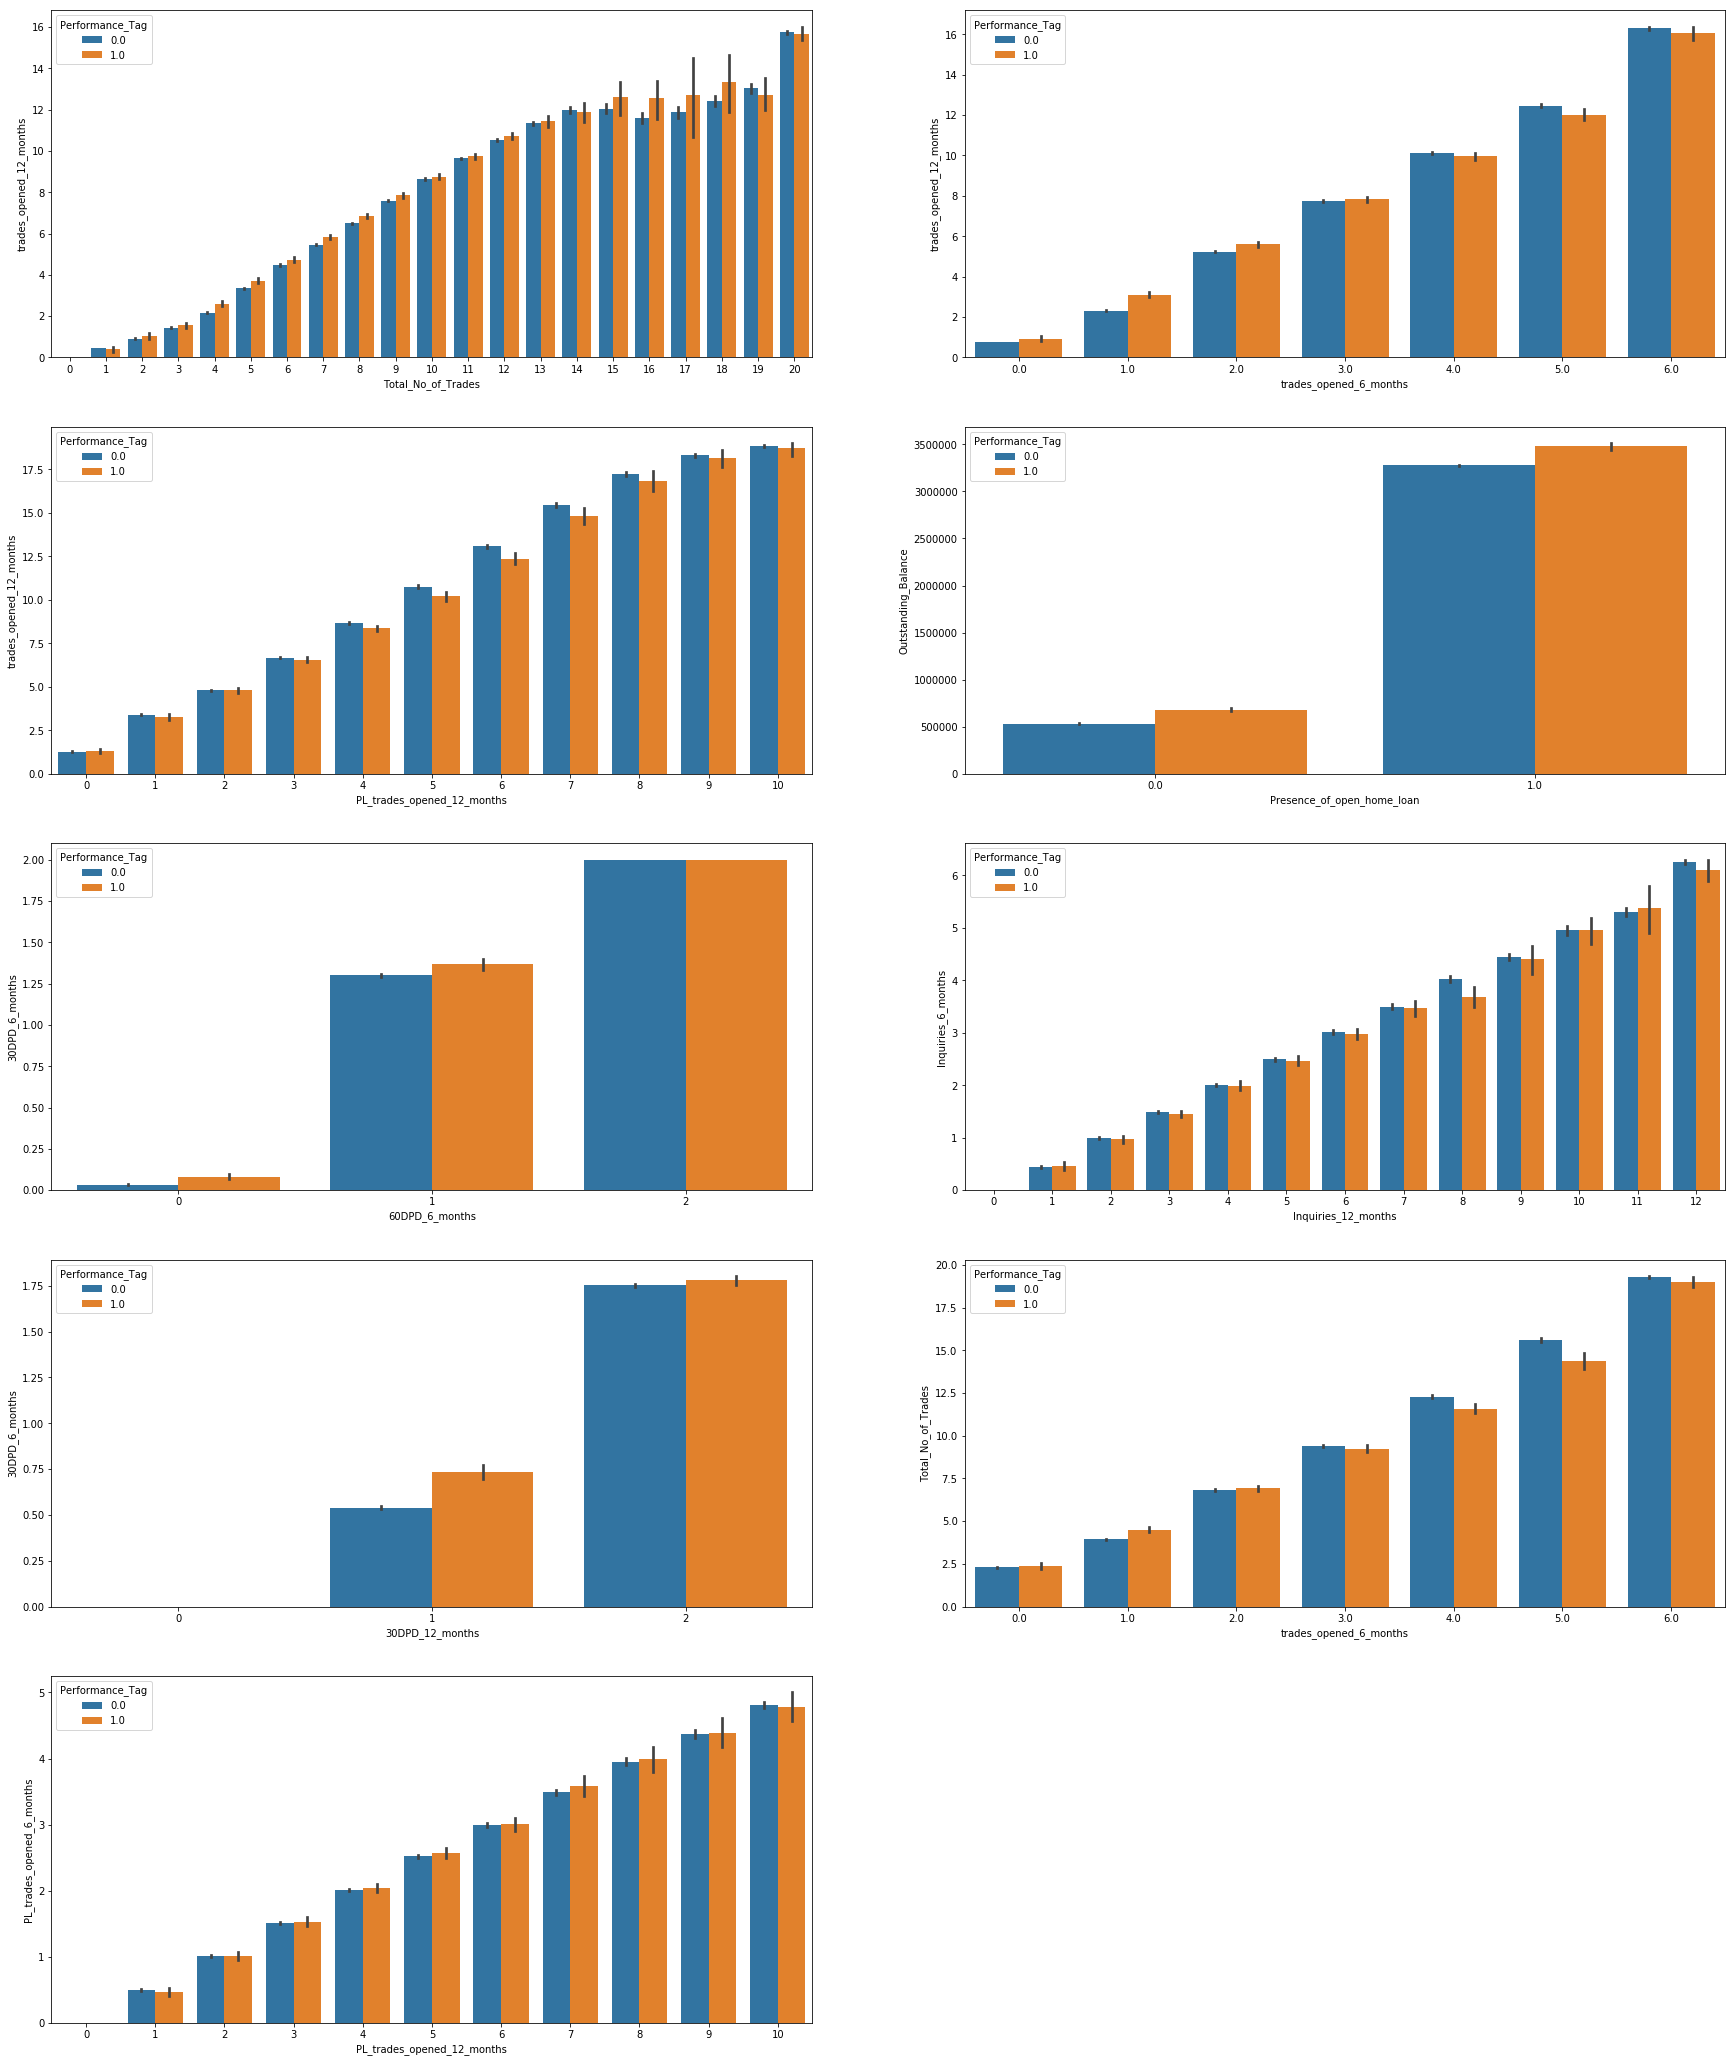

In [147]:
plt.figure(figsize=(30,60))
plt.subplot(8,2,1)
sns.barplot(x='Total_No_of_Trades', y="trades_opened_12_months", hue='Performance_Tag', data=df)
plt.subplot(8,2,2)
sns.barplot(x='trades_opened_6_months', y="trades_opened_12_months", hue='Performance_Tag', data=df)
plt.subplot(8,2,3)
sns.barplot(x='PL_trades_opened_12_months', y="trades_opened_12_months", hue='Performance_Tag', data=df)
plt.subplot(8,2,4)
sns.barplot(x='Presence_of_open_home_loan', y="Outstanding_Balance", hue='Performance_Tag', data=df)
plt.subplot(8,2,5)
sns.barplot(x='60DPD_6_months', y="30DPD_6_months", hue='Performance_Tag', data=df)
plt.subplot(8,2,6)
sns.barplot(x='Inquiries_12_months', y="Inquiries_6_months", hue='Performance_Tag', data=df)
plt.subplot(8,2,7)
sns.barplot(x='30DPD_12_months', y="30DPD_6_months", hue='Performance_Tag', data=df)
plt.subplot(8,2,8)
sns.barplot(x='trades_opened_6_months', y="Total_No_of_Trades", hue='Performance_Tag', data=df)
plt.subplot(8,2,9)
sns.barplot(x='PL_trades_opened_12_months', y="PL_trades_opened_6_months", hue='Performance_Tag', data=df)
plt.show()

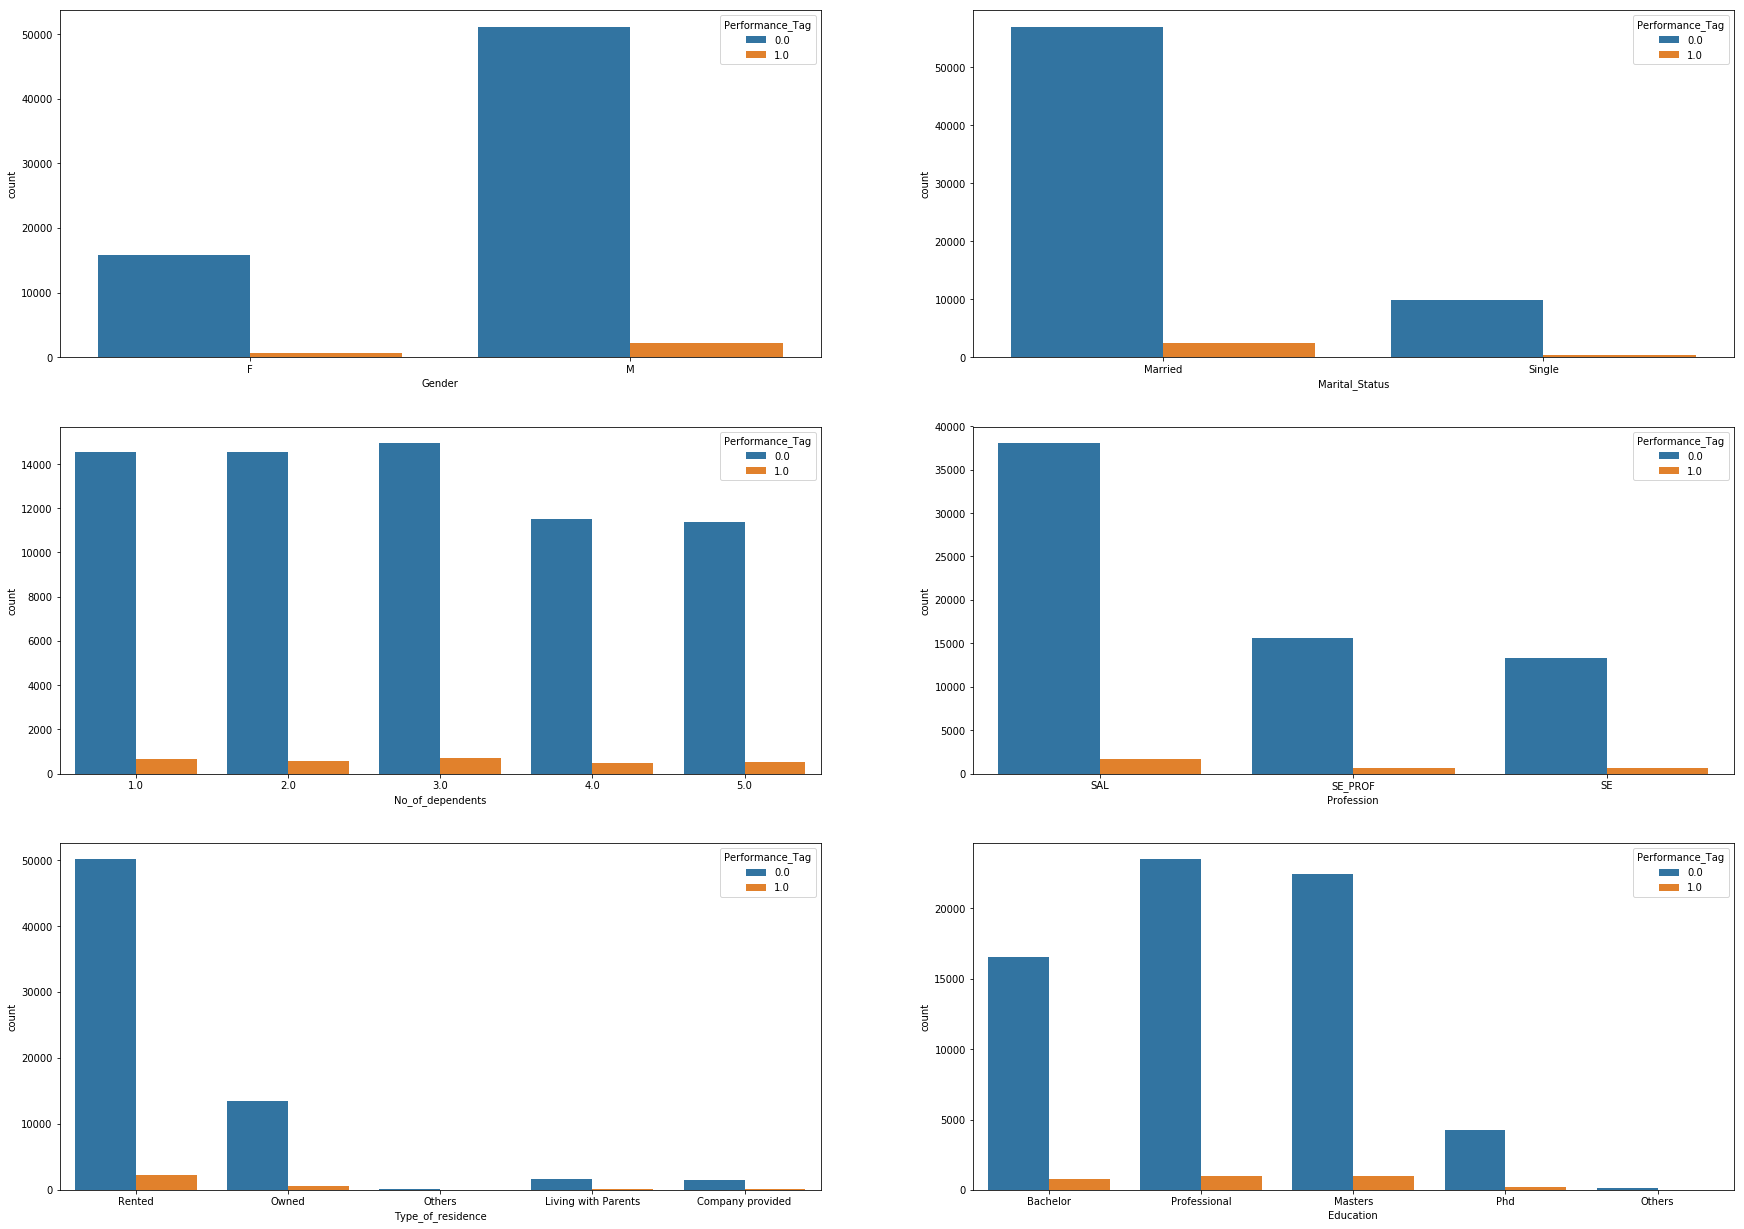

In [148]:
plt.figure(figsize=(30,60))
plt.subplot(8,2,1)
sns.countplot(x = "Gender",  hue = "Performance_Tag", data = df)
plt.subplot(8,2,2)
sns.countplot(x = "Marital_Status",  hue = "Performance_Tag", data = df)
plt.subplot(8,2,3)
sns.countplot(x = "No_of_dependents",  hue = "Performance_Tag", data = df)
plt.subplot(8,2,4)
sns.countplot(x = "Profession",  hue = "Performance_Tag", data = df)
plt.subplot(8,2,5)
sns.countplot(x = "Type_of_residence",  hue = "Performance_Tag", data = df)
plt.subplot(8,2,6)
sns.countplot(x = "Education",  hue = "Performance_Tag", data = df)
plt.show()

## WOE /IV analysis

In [149]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
                
            if count == 0:
                woe_df = conv
            else:
                woe_df = woe_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    
    woe = pd.DataFrame({'WOE':woe_df.groupby('VAR_NAME').WOE.max()})
    woe = woe.reset_index()
    return(iv_df,iv,woe)

In [150]:
final_iv, IV, WOE  = data_vars(df,df.Performance_Tag)

In [151]:
WOE = WOE.sort_values('WOE', ascending=False)
IV = IV.sort_values('IV', ascending=False)

In [152]:
result = pd.merge(WOE, IV, left_index=True, right_index=True, how='right')
result.drop(result.columns[[2]], axis = 1, inplace = True)
result.rename(columns={'VAR_NAME_x': 'VAR_NAME'}, inplace=True)

In [153]:
result_WOE = result.filter(['VAR_NAME', 'WOE'], axis=1)
result_WOE.sort_values(by=['WOE'], axis=0, ascending=False, inplace=True)

In [154]:
result_IV = result.filter(['VAR_NAME', 'IV'], axis=1)
result_IV.sort_values(by=['IV'], axis=0, ascending=False, inplace=True)

In [155]:
result_WOE_IV = result.filter(['VAR_NAME','WOE', 'IV'], axis=1)
result_WOE_IV.sort_values(by=['WOE','IV'], axis=0, ascending=False, inplace=True)
result_WOE_IV

,VAR_NAME,WOE,IV
5,90DPD_6_months,0.836550,0.030740
3,60DPD_6_months,0.743473,0.089594
1,30DPD_6_months,0.742953,0.145723
4,90DPD_12_months,0.722161,0.095732
0,30DPD_12_months,0.710276,0.188053
2,60DPD_12_months,0.694176,0.137688
8,Avg_CC_Util_12_months,0.503394,0.271010
9,Education,0.492517,0.000782
20,PL_trades_opened_6_months,0.400567,0.124712
19,PL_trades_opened_12_months,0.395627,0.176626


<Figure size 2160x4320 with 0 Axes>

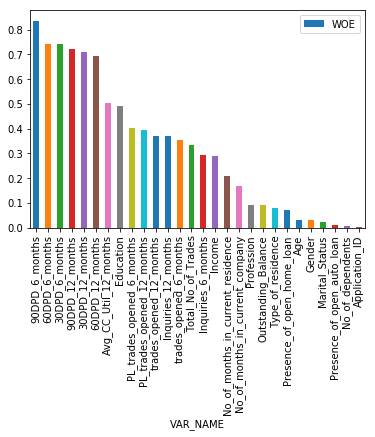

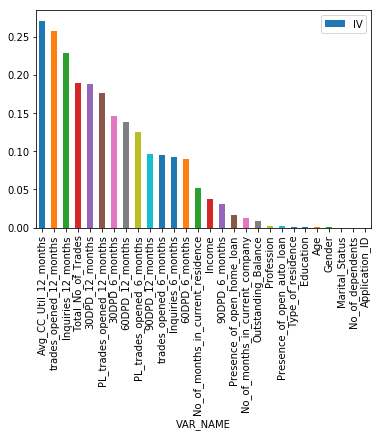

In [156]:
plt.figure(figsize=(30,60))
result_WOE.plot(x= 'VAR_NAME', y='WOE', kind='bar',stacked=True);
result_IV.plot(x= 'VAR_NAME', y='IV', kind='bar',stacked=True)

Notice that we have created a set of dummy columns for the feature job. Similarly, we are going to do the same for other categorical variables.

In [157]:
# Creating dummy variable for Gender column
Gender = pd.get_dummies(df['Gender'],prefix='Gender',drop_first=True)
df = pd.concat([df,Gender],axis=1)

In [158]:
# Creating dummy variable for Marital_Status column
Marital_Status = pd.get_dummies(df['Marital_Status'],prefix='Marital_Status',drop_first=True)
df = pd.concat([df,Marital_Status],axis=1)

In [159]:
# Creating dummy variable for Education column
Education = pd.get_dummies(df['Education'],prefix='Education',drop_first=True)
df = pd.concat([df,Education],axis=1)

In [160]:
# Creating dummy variable for Profession column
Profession = pd.get_dummies(df['Profession'],prefix='Profession',drop_first=True)
df = pd.concat([df,Profession],axis=1)

In [161]:
# Creating dummy variable for Type_of_residence column
Type_of_residence = pd.get_dummies(df['Type_of_residence'],prefix='Type_of_residence',drop_first=True)
df = pd.concat([df,Type_of_residence],axis=1)

In [162]:
# Drop all features for whom dummy variable has been created

df.drop(columns = ['Gender','Marital_Status','Education','Profession','Type_of_residence'], inplace=True)

In [163]:
df.head()

,Application_ID,Age,No_of_dependents,Income,No_of_months_in_current_residence,No_of_months_in_current_company,Performance_Tag,90DPD_6_months,60DPD_6_months,30DPD_6_months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Type_of_residence_Living with Parents,Type_of_residence_Others,Type_of_residence_Owned,Type_of_residence_Rented
0,954457215,48.0,2.0,40.0,113,56,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,432830445,31.0,4.0,55.0,112,46,0.0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,941387308,32.0,2.0,46.0,104,49,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,392161677,43.0,1.0,53.0,94,53,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,182011211,35.0,5.0,44.0,112,43,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [164]:
df = df[df.Performance_Tag.notnull()]

In [165]:
df.shape

(69860, 36)

###### Import library to split the dataset into test and train

In [166]:
from sklearn.model_selection import train_test_split

###### Putting feature variable to X
###### Putting response variable to y

In [167]:
X = df.drop(['Performance_Tag'],axis=1)
y = df['Performance_Tag']

## Correlation analysis

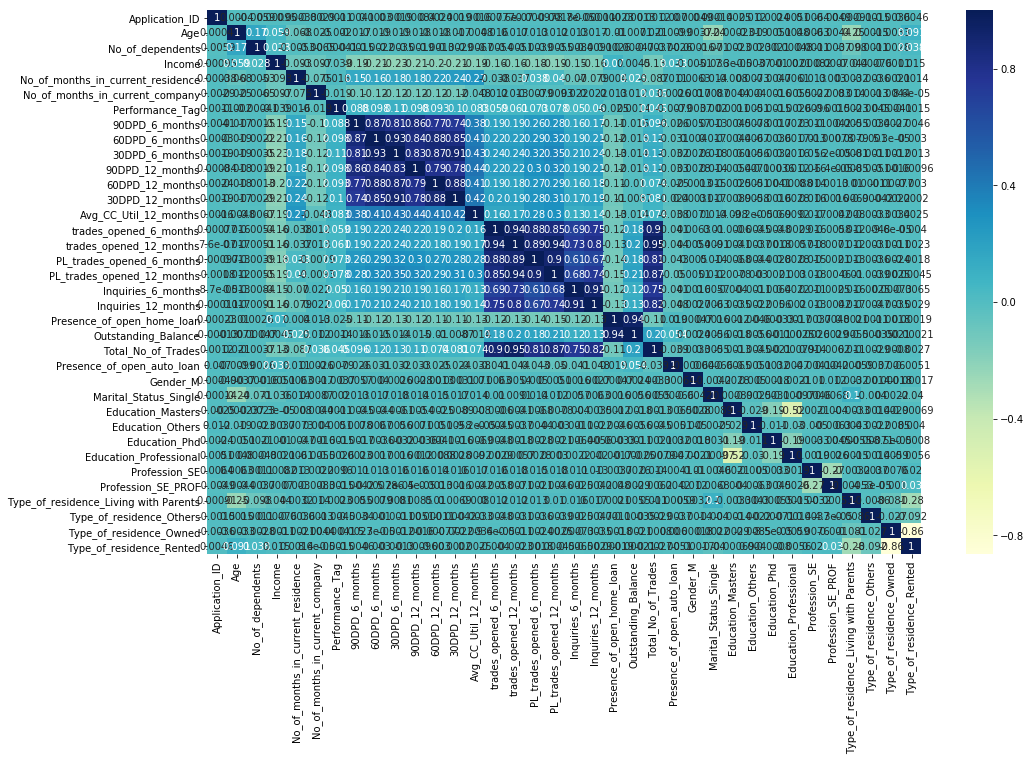

In [168]:
plt.figure(figsize = (16, 10))
cor = df.corr()
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [169]:
co = df[df.columns[1:]].corr()['Performance_Tag'][:]

In [170]:
Correlation_output = pd.DataFrame(co)
Correlation_output.sort_values(by=['Performance_Tag'], axis=0, ascending=False, inplace=True)
Correlation_output

,Performance_Tag
Performance_Tag,1.000000
30DPD_6_months,0.106214
30DPD_12_months,0.099939
90DPD_12_months,0.098429
60DPD_6_months,0.098038
60DPD_12_months,0.093471
90DPD_6_months,0.088071
Avg_CC_Util_12_months,0.083466
PL_trades_opened_12_months,0.077886
PL_trades_opened_6_months,0.073093


In [171]:
def correl(df):
    cor = df.corr()
    corrm = np.corrcoef(df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]
    ## change this value to get more correlation results        
    thresh = 0.9
    display(high_cor[high_cor>thresh])
correl(df)

max corr: 0.9538896656792751 , min corr:  -0.8634358867632492


trades_opened_12_months     Total_No_of_Trades           0.953890
trades_opened_6_months      trades_opened_12_months      0.938789
PL_trades_opened_12_months  trades_opened_12_months      0.935117
Presence_of_open_home_loan  Outstanding_Balance          0.935072
60DPD_6_months              30DPD_6_months               0.934969
Inquiries_6_months          Inquiries_12_months          0.912801
30DPD_12_months             30DPD_6_months               0.910503
trades_opened_6_months      Total_No_of_Trades           0.903969
PL_trades_opened_12_months  PL_trades_opened_6_months    0.900182
dtype: float64

In [172]:
#"Total_No_of_Trades" >> 0.953890 >> trades_opened_12_months
#"trades_opened_6_months" >> 0.938789 >>  "trades_opened_12_months"                                            
#"PL_trades_opened_12_months" >> 0.935117 >>  "trades_opened_12_months" 
#"Presence_of_open_home_loan" >> 0.935072 >>  "Outstanding_Balance"  
#"60DPD_6_months"   >> 0.934969 >>    "30DPD_6_months"                  
#"Inquiries_12_months"  >> 0.912801 >>  "Inquiries_6_months" 
#"30DPD_12_months"   >> 0.910503 >> "30DPD_6_months" 
#"trades_opened_6_months" >> 0.903969 >>  "Total_No_of_Trades" 
#"PL_trades_opened_12_months" >> 0.900182 >>   "PL_trades_opened_6_months" 

###### write treated Master file

In [173]:
df.to_csv("C:/users/Gaurav/Downloads/Capstone Project/df.csv", sep=',', index=False)

In [174]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [175]:
df = pd.read_csv("C:/Users/gaurav/Downloads/Capstone Project/df.csv")
#first few rows
df.head()

,Application_ID,Age,No_of_dependents,Income,No_of_months_in_current_residence,No_of_months_in_current_company,Performance_Tag,90DPD_6_months,60DPD_6_months,30DPD_6_months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Type_of_residence_Living with Parents,Type_of_residence_Others,Type_of_residence_Owned,Type_of_residence_Rented
0,954457215,48.0,2.0,40.0,113,56,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,432830445,31.0,4.0,55.0,112,46,0.0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,941387308,32.0,2.0,46.0,104,49,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,392161677,43.0,1.0,53.0,94,53,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,182011211,35.0,5.0,44.0,112,43,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [176]:
print('Dataframe Shape: ',df.shape); 
print("--------------------------------------------------------------------------");
print("Dataframe Info: \n"); df.info(); 
print("--------------------------------------------------------------------------");

Dataframe Shape:  (69860, 36)
--------------------------------------------------------------------------
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69860 entries, 0 to 69859
Data columns (total 36 columns):
Application_ID                           69860 non-null int64
Age                                      69860 non-null float64
No_of_dependents                         69860 non-null float64
Income                                   69860 non-null float64
No_of_months_in_current_residence        69860 non-null int64
No_of_months_in_current_company          69860 non-null int64
Performance_Tag                          69860 non-null float64
90DPD_6_months                           69860 non-null int64
60DPD_6_months                           69860 non-null int64
30DPD_6_months                           69860 non-null int64
90DPD_12_months                          69860 non-null int64
60DPD_12_months                          69860 non-null int64
30DPD_12_months 

In [177]:
# Create X (independent variable) & y (dependent variable) 
X = df.drop(['Performance_Tag'],axis=1)
y = df['Performance_Tag']

In [269]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [270]:
Z_train = X_train['Application_ID']

In [271]:
Z_train = pd.DataFrame(Z_train)

In [272]:
Z_train['ID'] = Z_train.index
Z_train.reset_index(level=0, inplace=True)

In [273]:
Z_train.drop(columns = 'index', inplace = True)


In [274]:
X_train = X_train.drop(['Application_ID'], axis=1)

In [275]:
Z_test = X_test['Application_ID']

In [276]:
Z_test = pd.DataFrame(Z_test)

In [277]:
Z_test['ID'] = Z_test.index
Z_test.reset_index(level=0, inplace=True)

In [278]:
Z_test.drop(columns = 'index', inplace = True)

In [279]:
#Z_test.drop(columns = 'ID', inplace = True)

In [280]:
X_test = X_test.drop(['Application_ID'], axis=1)

In [281]:
# print shapes of train and test sets
print (X_train.shape),
print (y_train.shape),
print (X_test.shape),
print (y_test.shape)

(48902, 34)
(48902,)
(20958, 34)
(20958,)


In [282]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (48902, 34)
X_test Dataframe Shape (20958, 34)
Imbalance in Train Data: 0.04469130527665029
Imbalance in Test Data: 0.0425309655275332


In [283]:
# (Training) Balance Data-Set --- SMOTE  
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (93620, 34)
y_tr Dataframe Shape (93620,)
Imbalance in Train Data: 1.0


## <font color='blue'>Modelling</font>

Now that the data preparation step is complete, we will jump straight into modelling
We will look at three different models

- Logistic Regression
- Decision Tree
- Random Forests

## <font color='blue'>Logistic Regression</font>

In [284]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_tr,y_tr)

#predictions
predictions = logreg.predict(X_test)

In [285]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
print(classification_report(y_test,predictions))
print("--------------------------------------------------------------------------");
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.57      0.72     20103
         1.0       0.06      0.65      0.11       855

    accuracy                           0.57     20958
   macro avg       0.52      0.61      0.41     20958
weighted avg       0.94      0.57      0.69     20958

--------------------------------------------------------------------------
[[11405  8698]
 [  299   556]]


In [286]:
print("Accuracy:",accuracy_score(y_test, predictions))
print("Precision:",precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))

Accuracy: 0.5707128542799885
Precision: 0.06008212664793603
Recall: 0.6502923976608187


## <font color='blue'>Decision Tree</font>

In [287]:
# Importing Decision Tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_tr,y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [288]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     20103
         1.0       0.07      0.03      0.04       855

    accuracy                           0.94     20958
   macro avg       0.52      0.51      0.51     20958
weighted avg       0.92      0.94      0.93     20958



In [289]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))

[[19771   332]
 [  829    26]]


In [290]:
print("Accuracy:",accuracy_score(y_test, y_pred_default))
print("Precision:",precision_score(y_test, y_pred_default))
print("Recall:",recall_score(y_test, y_pred_default))

Accuracy: 0.9446034926996851
Precision: 0.07262569832402235
Recall: 0.0304093567251462


In [291]:
dt_default.predict_proba(X_test)[:, 0]

array([0.94043321, 0.83606557, 0.70214733, ..., 0.95064279, 0.93396352,
       0.70214733])

In [292]:
dt_default.predict_proba(X_test)[:, 1]

array([0.05956679, 0.16393443, 0.29785267, ..., 0.04935721, 0.06603648,
       0.29785267])

## <font color='blue'>Random Forest</font>

In [293]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
clf = RandomForestClassifier()

clf.fit(X_tr,y_tr)

pred_train = clf.predict(X_tr)
pred_test = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_tr)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_tr), clf.predict_proba(X_tr)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf.predict_proba(X_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

# Let's check the report of our default model
print(classification_report(y_test,pred_test))

# Printing confusion matrix
print(confusion_matrix(y_test,pred_test))

# check area under curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     20103
         1.0       0.00      0.00      0.00       855

    accuracy                           0.96     20958
   macro avg       0.48      0.50      0.49     20958
weighted avg       0.92      0.96      0.94     20958

[[20090    13]
 [  855     0]]
AUC:    	 0.57


In [294]:
print("Accuracy:",accuracy_score(y_test, pred_test))
print("Precision:",precision_score(y_test, pred_test))
print("Recall:",recall_score(y_test, pred_test))

Accuracy: 0.9585838343353373
Precision: 0.0
Recall: 0.0


## Application Scorecard 

In [295]:
abc = dt_default.predict_proba(X_test)[:, 0]
abc = pd.DataFrame(abc)
abc = abc.rename(columns={0: 'bad'})
abc.head()

,bad
0,0.940433
1,0.836066
2,0.702147
3,0.904818
4,0.702147


In [296]:
cde = dt_default.predict_proba(X_test)[:, 1]
cde = pd.DataFrame(cde)
cde = cde.rename(columns={0: 'good'})
cde.head()

,good
0,0.059567
1,0.163934
2,0.297853
3,0.095182
4,0.297853


In [297]:
test_test = pd.DataFrame(y_pred_default)
test_test = test_test.rename(columns={0: 'Performance_Tag'})
test_test.reset_index(level=0, inplace=True)
test_test.drop(columns = 'index', inplace = True)
test_test.head()

,Performance_Tag
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [298]:
test_test.Performance_Tag.sum()

358.0

In [299]:
#Application Scorecard 
from sklearn import metrics 
score_data = pd.concat([Z_test,test_test], axis=1) 
score_data['bad'] = abc
score_data['good'] = cde
score_data['odds'] = np.log(score_data['good']/score_data['bad']) 
PDO = 20.0 
BaseScore = 400.0 
Odds = 10.0 
Factor = PDO/np.log(2) 
Offset = BaseScore-(Factor*np.log(Odds)) 
score_data['score'] = np.round(Offset+(Factor*score_data['odds'])) 
fpr, tpr, thresholds = metrics.roc_curve(y_true = test_test, y_score = cde) 
cut_off_prediction_probability_score = thresholds[np.argmax(tpr-fpr)] 
cut_off_score = np.round(Offset+(Factor*np.log(cut_off_prediction_probability_score/(1-cut_off_prediction_probability_score)))) 
print(cut_off_score, cut_off_prediction_probability_score) 

# score_data_sorted = score_data.sort_values(['score']) 
# print(score_data_sorted[['score','Performance_Tag_credit','good']]) 
reject = score_data[score_data['Performance_Tag'] == 0.0] 
print(reject.describe()) 

approved = score_data[score_data['Performance_Tag'] == 1.0] 
print(approved.describe())

340.0 0.5542825968357883
       Application_ID            ID  Performance_Tag           bad  \
count    2.060000e+04  20600.000000          20600.0  20600.000000   
mean     5.002555e+08  34182.355922              0.0      0.806672   
std      2.882229e+08  20057.864204              0.0      0.125678   
min      1.004500e+05      8.000000              0.0      0.506221   
25%      2.495287e+08  16799.750000              0.0      0.702147   
50%      4.974426e+08  33884.500000              0.0      0.818318   
75%      7.499282e+08  51327.500000              0.0      0.933964   
max      1.000057e+09  69851.000000              0.0      0.950643   

               good          odds         score  
count  20600.000000  20600.000000  20600.000000  
mean       0.193328     -1.662314    285.661165  
std        0.125678      0.896083     25.946972  
min        0.049357     -2.958055    248.000000  
25%        0.066036     -2.649230    257.000000  
50%        0.181682     -1.504995    290.000

In [300]:
pred_prob = pd.DataFrame(pd.Series(y_pred_prob), columns = ['pred_prob'])

In [301]:
decile_df = pd.concat([pd.DataFrame(y_test).reset_index(), pred_prob], ignore_index=True,axis=1)

In [302]:
decile_df.drop(0, inplace=True, axis = 1)

In [303]:
decile_df.rename({1:'actual', 2:'pred_prob'}, axis=1, inplace=True)

In [304]:
decile_df.shape

(20958, 2)

In [305]:
y_test.shape

(20958,)

In [306]:
decile_df['ID'] = y_test.index

In [307]:
decile_df = pd.merge(decile_df, Z_test, on='ID')

In [308]:
decile_df['predicted'] = decile_df.pred_prob.map( lambda x: 1 if x > 0.5 else 0)

In [309]:
decile_df

,actual,pred_prob,ID,Application_ID,predicted
0,0.0,0.1,26040,539297897,0
1,0.0,0.2,68214,531033852,0
2,0.0,0.0,37823,284425251,0
3,0.0,0.2,45185,692090896,0
4,0.0,0.0,43123,901362948,0
5,0.0,0.2,33462,614744141,0
6,0.0,0.0,18003,143384701,0
7,0.0,0.0,52929,696999803,0
8,0.0,0.0,10176,250399107,0
9,0.0,0.1,55138,389718475,0


In [310]:
# predict churn on test data
y_pred = dt_default.predict(X_tr)

# create onfusion matrix
cm = confusion_matrix(y_tr, y_pred)
print(cm)

# check area under curve
y_pred_prob = dt_default.predict_proba(X_tr)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_tr, y_pred_prob),2))

[[45993   817]
 [12511 34299]]
AUC:    	 0.92


In [311]:
pred_train_prob = pd.DataFrame(pd.Series(y_pred_prob), columns = ['pred_prob'])

In [312]:
decile_train_df = pd.concat([pd.DataFrame(y_tr).reset_index(), pred_train_prob], ignore_index=True,axis=1)

In [313]:
decile_train_df.drop(0, inplace=True, axis = 1)

In [314]:
decile_train_df.rename({1:'actual', 2:'pred_prob'}, axis=1, inplace=True)

In [315]:
train = pd.DataFrame(y_tr)

In [316]:
decile_train_df['ID'] = train.index

In [317]:
decile_train_df = pd.merge(decile_train_df, Z_train, on='ID')

In [318]:
decile_train_df['predicted'] = decile_train_df.pred_prob.map( lambda x: 1 if x > 0.5 else 0)

In [319]:
decile_train_df.head()

,actual,pred_prob,ID,Application_ID,predicted
0,0.0,0.112773,0,954457215,0
1,0.0,0.066036,1,432830445,0
2,1.0,0.297853,2,941387308,0
3,0.0,0.297853,3,392161677,0
4,0.0,0.182812,4,182011211,0


In [320]:
result = decile_df.append(decile_train_df, ignore_index=True)

In [321]:
result.head()

,actual,pred_prob,ID,Application_ID,predicted
0,0.0,0.1,26040,539297897,0
1,0.0,0.2,68214,531033852,0
2,0.0,0.0,37823,284425251,0
3,0.0,0.2,45185,692090896,0
4,0.0,0.0,43123,901362948,0


In [322]:
result.sort_values(by=['ID']).head()

,actual,pred_prob,ID,Application_ID,predicted
20958,0.0,0.112773,0,954457215,0
20959,0.0,0.066036,1,432830445,0
20960,1.0,0.297853,2,941387308,0
20961,0.0,0.297853,3,392161677,0
20962,0.0,0.182812,4,182011211,0


In [323]:
result['decile'] = pd.qcut(result['pred_prob'], 5, labels=np.arange(5, 0, -1))

In [324]:
lift_df = result.groupby('decile')['pred_prob'].count().reset_index()

In [325]:
lift_df.rename({'pred_prob':'total'}, axis=1, inplace=True)

In [326]:
lift_df_pred = result[result['actual']==1].groupby('decile')['actual'].count().reset_index()

In [327]:
lift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
decile    5 non-null category
total     5 non-null int64
dtypes: category(1), int64(1)
memory usage: 253.0 bytes


In [328]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

In [329]:
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

In [330]:
lift_df_final['cumresp'] = lift_df_final['actual'].cumsum()

In [331]:
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual']))

In [332]:
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [333]:
lift_df_final

,decile,total,actual,cumresp,gain,cumlift
4,1,12071,11435,11435,67.012424,6.701242
3,2,15711,3214,14649,85.847398,4.292370
2,3,10999,1215,15864,92.967651,3.098922
1,4,15631,691,16555,97.017112,2.425428
0,5,15448,509,17064,100.000000,2.000000


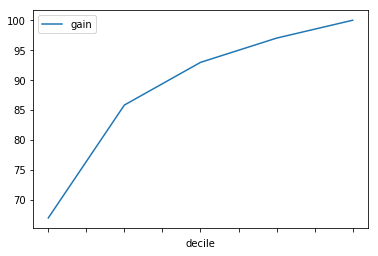

In [334]:
lift_df_final.plot.line(x='decile', y=['gain'])

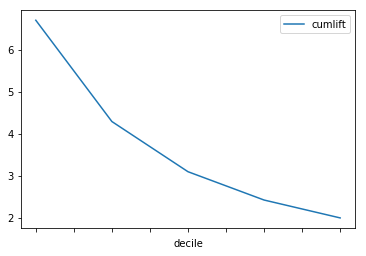

In [335]:
lift_df_final.plot.line(x='decile', y=['cumlift'])